In [1]:
# Import libraries
import numpy as np
print('numpy version\t:', np.__version__)
import pandas as pd
print('pandas version\t:', pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('seaborn version\t:', sns.__version__)

pd.set_option('display.max_columns', 60)
pd.options.display.float_format = '{:.4f}'.format

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

numpy version	: 1.18.5
pandas version	: 1.0.5
seaborn version	: 0.10.1


In [2]:
df = pd.read_excel('NBFC Loan Transaction Data.xlsx')
df.head()

,AGREEMENTID,AUTHORIZATIONDATE,BALANCE_EXCESS,BALANCE_TENURE,CITY,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,CURRENT_TENOR,CUSTOMERID,DIFF_AUTH_INT_DATE,DIFF_CURRENT_INTEREST_RATE_MAX_MIN,DIFF_EMI_AMOUNT_MAX_MIN,DIFF_ORIGINAL_CURRENT_INTEREST_RATE,DIFF_ORIGINAL_CURRENT_TENOR,DPD,DUEDAY,EMI_AMOUNT,EMI_DUEAMT,EMI_OS_AMOUNT,EMI_RECEIVED_AMT,EXCESS_ADJUSTED_AMT,EXCESS_AVAILABLE,FOIR,INTEREST_START_DATE,LAST_RECEIPT_AMOUNT,LAST_RECEIPT_DATE,LATEST_TRANSACTION_MONTH,LOAN_AMT,MAX_EMI_AMOUNT,MIN_EMI_AMOUNT,MONTHOPENING,NET_DISBURSED_AMT,NET_LTV,NET_RECEIVABLE,NUM_EMI_CHANGES,NUM_LOW_FREQ_TRANSACTIONS,ORIGNAL_INTEREST_RATE,ORIGNAL_TENOR,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,FORECLOSURE
0,11220001,2010-08-29,0.0000,0,MUMBAI,45,13.4219,13.7341,13.4219,1,45,12001000.0000,1,0.3121,916441.0000,-2.8092,75,0,1,83559.0000,8614898.2784,175477.7826,8439420.4958,213586.8554,213586.8554,0.6000,2010-08-30,1000000.0000,2014-05-05,5.0000,11710107.2400,1000000.0000,83559.0000,8693575.3278,11710107.2400,40.0600,175477.7826,1,1,10.6127,120,116447.2281,2725722.8838,11593660.0119,7994.2736,0.0000,7994.2736,HL,10901100.0000,NaN,NaN,45,1
1,11220002,2010-09-15,0.0000,99,MUMBAI,38,13.7341,13.7341,13.7341,0,137,12001001.0000,0,0.0000,0.0000,-3.1214,43,0,1,126530.0000,10619027.2133,279448.0846,10339579.1287,0.0000,0.0000,0.6000,2010-09-15,126530.0000,2013-11-01,11.0000,19290253.3236,126530.0000,126530.0000,17138606.0165,19290253.3236,84.3100,279448.0846,0,0,10.6127,180,12347597.2961,4945153.5911,6942656.0275,100504.5759,0.0000,100504.5759,HL,10901100.0000,NaN,NaN,38,1
2,11220006,2010-11-02,0.0000,231,MUMBAI,81,15.6069,16.2312,15.6069,2,312,12001005.0000,-1,0.6243,477122.0000,-4.0578,-132,0,5,22878.0000,4670210.6849,0.0000,4670210.6849,1179715.7192,1179715.7192,0.7200,2010-11-01,22878.0000,2017-08-05,8.0000,3933394.9960,500000.0000,22878.0000,3744831.4178,3933394.9960,50.8900,0.0000,2,3,11.5491,180,2994183.5178,2990124.0140,939211.4782,5947.6305,0.0000,5947.6305,HL,10901101.0000,NaN,NaN,81,1
3,11220008,2010-10-06,0.0000,0,THANE,91,11.2370,13.7341,11.2370,4,91,12001007.0000,0,2.4971,1434259.0000,-0.6243,89,0,1,65741.0000,13130976.8136,63659.2808,13067317.5329,6770848.4170,6770848.4170,0.6000,2010-10-06,65741.0000,2018-05-02,5.0000,10022587.7064,1500000.0000,65741.0000,5747875.2421,10022587.7064,84.6300,63659.2808,3,8,10.6127,180,42951.2021,4648994.2748,9979636.5043,60322.1808,0.0000,60322.1808,HL,10901100.0000,NaN,NaN,91,1
4,11220010,2010-10-26,0.0000,215,MUMBAI,89,14.9826,15.6069,14.9826,2,304,12001009.0000,0,0.6243,0.0000,-4.0578,-124,0,5,54433.0000,10489232.8208,0.0000,10489232.8208,120218.1110,120218.1110,0.8300,2010-10-26,54433.0000,2018-04-05,4.0000,7755937.3127,54433.0000,54433.0000,7200652.6148,7755937.3127,30.9400,0.0000,0,3,10.9248,180,7200652.6148,6593777.8084,555284.6979,27732.7875,0.0000,27732.7875,HL,10901101.0000,NaN,NaN,90,1


In [3]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 20012 
The number of columns (variables) is 53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

In [5]:
df.dtypes.value_counts()


float64           32
int64             14
object             4
datetime64[ns]     3
dtype: int64

In [6]:
dup_rows = df.duplicated()

In [7]:
df.drop_duplicates(inplace=True)
df.shape
print('Number of duplicate rows = %d' % (dup_rows.sum()))
print(df.shape)

Number of duplicate rows = 0
(20012, 53)


In [8]:
null = df.columns[df.isnull().any()]
df[null].isnull().sum()

CUSTOMERID                    281
DIFF_EMI_AMOUNT_MAX_MIN        89
LAST_RECEIPT_AMOUNT           247
LAST_RECEIPT_DATE              75
LATEST_TRANSACTION_MONTH       75
MAX_EMI_AMOUNT                 89
MIN_EMI_AMOUNT                 89
SCHEMEID                      281
NPA_IN_LAST_MONTH           19893
NPA_IN_CURRENT_MONTH        19893
dtype: int64

In [9]:
df[null].isnull().sum().sum()

41012

In [10]:
df[null].isnull().sum().sum()

41012

In [11]:
Null_Perc = round(df[null].isnull().sum()/len(df)*100,2)
Null_Perc

CUSTOMERID                  1.4000
DIFF_EMI_AMOUNT_MAX_MIN     0.4400
LAST_RECEIPT_AMOUNT         1.2300
LAST_RECEIPT_DATE           0.3700
LATEST_TRANSACTION_MONTH    0.3700
MAX_EMI_AMOUNT              0.4400
MIN_EMI_AMOUNT              0.4400
SCHEMEID                    1.4000
NPA_IN_LAST_MONTH          99.4100
NPA_IN_CURRENT_MONTH       99.4100
dtype: float64

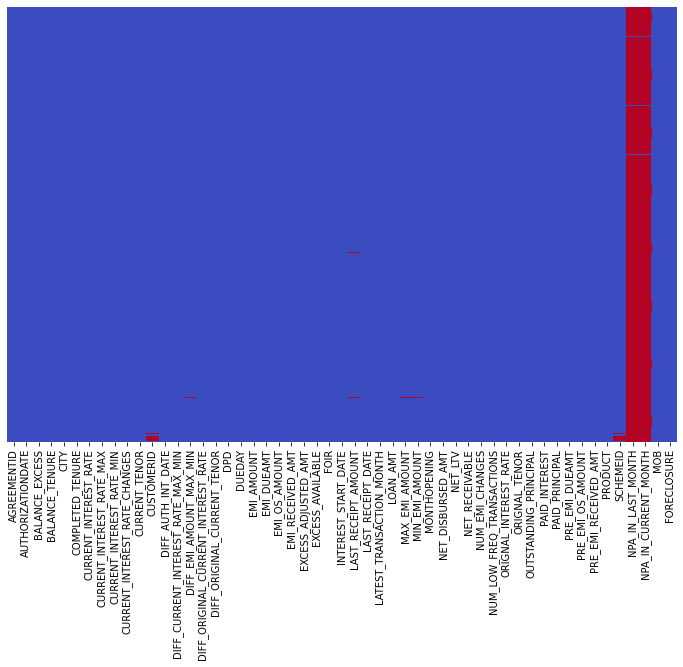

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [13]:
df1 = df.drop('CUSTOMERID', axis = 1) 
# Customer Id has few missing values and the data is unique at a agremment id level,
# which will not help in foreclosure prediction, which can be dropped.

In [14]:
df1 = df1.drop('SCHEMEID', axis = 1) 
# Scheme Id has few missing values and the data has no extra information, 
# which will not help in foreclosure prediction, which can be dropped.

In [15]:
df1 = df1.drop('MOB', axis = 1) 
# MOB is an internal code and the data has no extra information, 
# which will not help in foreclosure prediction, which can be dropped.

In [16]:
pd.crosstab(df.NPA_IN_LAST_MONTH, df.FORECLOSURE,  margins=True)
# NPA_IN_LAST_MONTH variable has 99.41 misssing values and only 2 Foreclosure's of 15 NPA's, which is not a good predictor.
# So will drop this variable.

FORECLOSURE,0,1,All
NPA_IN_LAST_MONTH,,,
0,69,33,102
#N/,2,0,2
Yes,13,2,15
All,84,35,119


In [17]:
df1 = df1.drop('NPA_IN_LAST_MONTH', axis = 1) 

In [18]:
pd.crosstab(df.NPA_IN_CURRENT_MONTH, df.FORECLOSURE,  margins=True)
# NPA_IN_CURRENT_MONTH variable has 99.41 misssing values and only 2 Foreclosure's of 16 NPA's, which is not a good predictor.
# So will drop this variable.

FORECLOSURE,0,1,All
NPA_IN_CURRENT_MONTH,,,
0,70,33,103
Yes,14,2,16
All,84,35,119


In [19]:
df1 = df1.drop('NPA_IN_CURRENT_MONTH', axis = 1) 

In [20]:
df1['MIN_EMI_AMOUNT'].describe()

count     19923.0000
mean       7045.0255
std       43425.4883
min           0.0100
25%         118.0000
50%         133.1800
75%        3334.0000
max     3156965.0000
Name: MIN_EMI_AMOUNT, dtype: float64

In [21]:
median = df1['MIN_EMI_AMOUNT'].median()
df1['MIN_EMI_AMOUNT'].fillna(value=median,inplace=True)

In [22]:
df1['MIN_EMI_AMOUNT'].describe()

count     20012.0000
mean       7014.2862
std       43331.2530
min           0.0100
25%         118.0000
50%         133.1800
75%        3299.2500
max     3156965.0000
Name: MIN_EMI_AMOUNT, dtype: float64

In [23]:
df1['MAX_EMI_AMOUNT'].describe()

count      19923.0000
mean      122254.4415
std       970451.5905
min           13.3400
25%        13318.0000
50%        23600.0000
75%        49360.5000
max     84968811.9000
Name: MAX_EMI_AMOUNT, dtype: float64

In [24]:
median = df1['MAX_EMI_AMOUNT'].median()
df1['MAX_EMI_AMOUNT'].fillna(value=median,inplace=True)

In [25]:
df1['MAX_EMI_AMOUNT'].describe()

count      20012.0000
mean      121815.6924
std       968313.3702
min           13.3400
25%        13352.0000
50%        23600.0000
75%        49220.5000
max     84968811.9000
Name: MAX_EMI_AMOUNT, dtype: float64

In [26]:
df1['DIFF_EMI_AMOUNT_MAX_MIN'].describe()

count      19923.0000
mean      115209.4159
std       967082.4406
min            0.0000
25%        10207.0000
50%        19885.0000
75%        42466.4850
max     84968249.9000
Name: DIFF_EMI_AMOUNT_MAX_MIN, dtype: float64

In [27]:
median = df1['DIFF_EMI_AMOUNT_MAX_MIN'].median()
df1['DIFF_EMI_AMOUNT_MAX_MIN'].fillna(value=median,inplace=True)

In [28]:
df1['DIFF_EMI_AMOUNT_MAX_MIN'].describe()

count      20012.0000
mean      114785.4766
std       964950.3164
min            0.0000
25%        10253.0000
50%        19885.0000
75%        42242.5000
max     84968249.9000
Name: DIFF_EMI_AMOUNT_MAX_MIN, dtype: float64

In [29]:
df1['LATEST_TRANSACTION_MONTH'].describe()

count   19937.0000
mean       10.6922
std         2.8214
min         1.0000
25%        12.0000
50%        12.0000
75%        12.0000
max        12.0000
Name: LATEST_TRANSACTION_MONTH, dtype: float64

In [30]:
median = df1['LATEST_TRANSACTION_MONTH'].median()
df1['LATEST_TRANSACTION_MONTH'].fillna(value=median,inplace=True)

In [31]:
df1['LATEST_TRANSACTION_MONTH'].describe()

count   20012.0000
mean       10.6971
std         2.8173
min         1.0000
25%        12.0000
50%        12.0000
75%        12.0000
max        12.0000
Name: LATEST_TRANSACTION_MONTH, dtype: float64

In [32]:
df1['LAST_RECEIPT_AMOUNT'].describe()

count      19765.0000
mean       80674.4580
std       808402.6951
min            1.0000
25%        11061.0000
50%        19642.0000
75%        38219.0000
max     84968811.9000
Name: LAST_RECEIPT_AMOUNT, dtype: float64

In [33]:
median = df1['LAST_RECEIPT_AMOUNT'].median()
df1['LAST_RECEIPT_AMOUNT'].fillna(value=median,inplace=True)

In [34]:
df1['LAST_RECEIPT_AMOUNT'].describe()

count      20012.0000
mean       79921.1591
std       803426.3223
min            1.0000
25%        11167.0000
50%        19642.0000
75%        37848.2500
max     84968811.9000
Name: LAST_RECEIPT_AMOUNT, dtype: float64

In [35]:
df1['LAST_RECEIPT_DATE'].describe()

count                   19937
unique                    721
top       2018-12-05 00:00:00
freq                    11512
first     2013-10-10 00:00:00
last      2019-01-01 00:00:00
Name: LAST_RECEIPT_DATE, dtype: object

In [36]:
mode = df1['LAST_RECEIPT_DATE'].mode()
df1['LAST_RECEIPT_DATE'].fillna(value='mode',inplace=True)

In [37]:
df1['LAST_RECEIPT_DATE'].describe()

count                   20012
unique                    722
top       2018-12-05 00:00:00
freq                    11512
Name: LAST_RECEIPT_DATE, dtype: object

In [38]:
df1.isnull().sum().sum()

0

In [39]:
Null_Perc_final = round(df1.isnull().sum()/len(df1)*100,2)
Null_Perc_final

AGREEMENTID                           0.0000
AUTHORIZATIONDATE                     0.0000
BALANCE_EXCESS                        0.0000
BALANCE_TENURE                        0.0000
CITY                                  0.0000
COMPLETED_TENURE                      0.0000
CURRENT_INTEREST_RATE                 0.0000
CURRENT_INTEREST_RATE_MAX             0.0000
CURRENT_INTEREST_RATE_MIN             0.0000
CURRENT_INTEREST_RATE_CHANGES         0.0000
CURRENT_TENOR                         0.0000
DIFF_AUTH_INT_DATE                    0.0000
DIFF_CURRENT_INTEREST_RATE_MAX_MIN    0.0000
DIFF_EMI_AMOUNT_MAX_MIN               0.0000
DIFF_ORIGINAL_CURRENT_INTEREST_RATE   0.0000
DIFF_ORIGINAL_CURRENT_TENOR           0.0000
DPD                                   0.0000
DUEDAY                                0.0000
EMI_AMOUNT                            0.0000
EMI_DUEAMT                            0.0000
EMI_OS_AMOUNT                         0.0000
EMI_RECEIVED_AMT                      0.0000
EXCESS_ADJ

In [40]:
df1.columns

Index(['AGREEMENTID', 'AUTHORIZATIONDATE', 'BALANCE_EXCESS', 'BALANCE_TENURE',
       'CITY', 'COMPLETED_TENURE', 'CURRENT_INTEREST_RATE',
       'CURRENT_INTEREST_RATE_MAX', 'CURRENT_INTEREST_RATE_MIN',
       'CURRENT_INTEREST_RATE_CHANGES', 'CURRENT_TENOR', 'DIFF_AUTH_INT_DATE',
       'DIFF_CURRENT_INTEREST_RATE_MAX_MIN', 'DIFF_EMI_AMOUNT_MAX_MIN',
       'DIFF_ORIGINAL_CURRENT_INTEREST_RATE', 'DIFF_ORIGINAL_CURRENT_TENOR',
       'DPD', 'DUEDAY', 'EMI_AMOUNT', 'EMI_DUEAMT', 'EMI_OS_AMOUNT',
       'EMI_RECEIVED_AMT', 'EXCESS_ADJUSTED_AMT', 'EXCESS_AVAILABLE', 'FOIR',
       'INTEREST_START_DATE', 'LAST_RECEIPT_AMOUNT', 'LAST_RECEIPT_DATE',
       'LATEST_TRANSACTION_MONTH', 'LOAN_AMT', 'MAX_EMI_AMOUNT',
       'MIN_EMI_AMOUNT', 'MONTHOPENING', 'NET_DISBURSED_AMT', 'NET_LTV',
       'NET_RECEIVABLE', 'NUM_EMI_CHANGES', 'NUM_LOW_FREQ_TRANSACTIONS',
       'ORIGNAL_INTEREST_RATE', 'ORIGNAL_TENOR', 'OUTSTANDING_PRINCIPAL',
       'PAID_INTEREST', 'PAID_PRINCIPAL', 'PRE_EMI_DUEAMT',
  

In [41]:
test_vars_all = ['AGREEMENTID', 'AUTHORIZATIONDATE', 'BALANCE_EXCESS', 'BALANCE_TENURE',
       'CITY', 'COMPLETED_TENURE', 'CURRENT_INTEREST_RATE',
       'CURRENT_INTEREST_RATE_MAX', 'CURRENT_INTEREST_RATE_MIN',
       'CURRENT_INTEREST_RATE_CHANGES', 'CURRENT_TENOR', 'DIFF_AUTH_INT_DATE',
       'DIFF_CURRENT_INTEREST_RATE_MAX_MIN', 'DIFF_EMI_AMOUNT_MAX_MIN',
       'DIFF_ORIGINAL_CURRENT_INTEREST_RATE', 'DIFF_ORIGINAL_CURRENT_TENOR',
       'DPD', 'DUEDAY', 'EMI_AMOUNT', 'EMI_DUEAMT', 'EMI_OS_AMOUNT',
       'EMI_RECEIVED_AMT', 'EXCESS_ADJUSTED_AMT', 'EXCESS_AVAILABLE', 'FOIR',
       'INTEREST_START_DATE', 'LAST_RECEIPT_AMOUNT', 'LAST_RECEIPT_DATE',
       'LATEST_TRANSACTION_MONTH', 'LOAN_AMT', 'MAX_EMI_AMOUNT',
       'MIN_EMI_AMOUNT', 'MONTHOPENING', 'NET_DISBURSED_AMT', 'NET_LTV',
       'NET_RECEIVABLE', 'NUM_EMI_CHANGES', 'NUM_LOW_FREQ_TRANSACTIONS',
       'ORIGNAL_INTEREST_RATE', 'ORIGNAL_TENOR', 'OUTSTANDING_PRINCIPAL',
       'PAID_INTEREST', 'PAID_PRINCIPAL', 'PRE_EMI_DUEAMT',
       'PRE_EMI_OS_AMOUNT', 'PRE_EMI_RECEIVED_AMT', 'PRODUCT', 'FORECLOSURE']


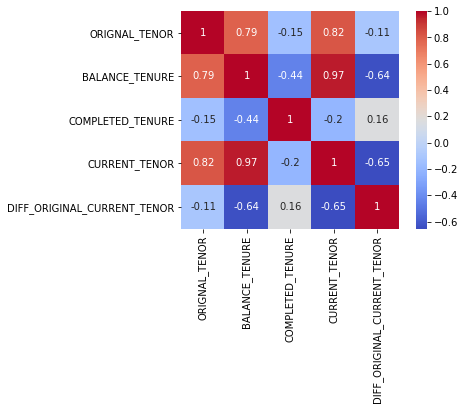

In [42]:
df2=df1.copy()
test_tenor = ['ORIGNAL_TENOR', 'BALANCE_TENURE','COMPLETED_TENURE','CURRENT_TENOR', 'DIFF_ORIGINAL_CURRENT_TENOR']
df2=df2[test_tenor]
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm',square=True)

# Insights: From the below correlation graph, Original Tenor, Balance Tenor and Current Tenor are highly correlated, 
# Balance Tenor will be retained along with Completed Tenor , with domain understanding  
# dropping Original Tenor, Current Tenor & difference betwn original and current tenor

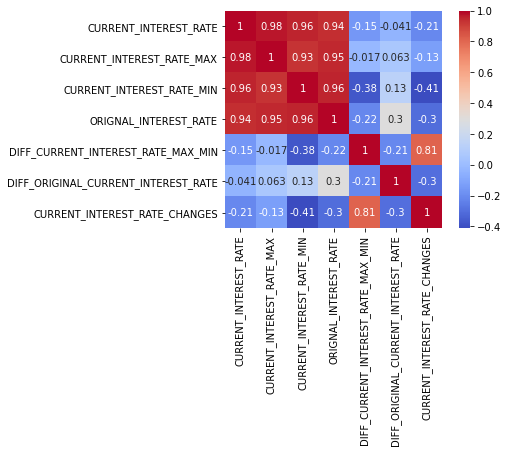

In [43]:
df2=df1.copy()
test_IntRate =['CURRENT_INTEREST_RATE','CURRENT_INTEREST_RATE_MAX','CURRENT_INTEREST_RATE_MIN','ORIGNAL_INTEREST_RATE','DIFF_CURRENT_INTEREST_RATE_MAX_MIN','DIFF_ORIGINAL_CURRENT_INTEREST_RATE','CURRENT_INTEREST_RATE_CHANGES']
df2=df2[test_IntRate]
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm',square=True)

#Insights1: Current Interest rate is highly correlated with other version of available interest rates(Max, Min & Original), Current Interest rate will be retained, others dropped.
#Insights2: Difference between Current max and Current min & Difference between Origianl and Current Interest Rate & Current interst rate changes dropped as no insights derived from it. 


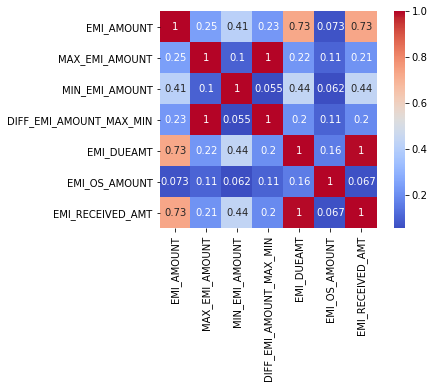

In [44]:
df2=df1.copy()
test_emiamt =['EMI_AMOUNT','MAX_EMI_AMOUNT','MIN_EMI_AMOUNT','DIFF_EMI_AMOUNT_MAX_MIN','EMI_DUEAMT','EMI_OS_AMOUNT','EMI_RECEIVED_AMT']
df2=df2[test_emiamt]
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm',square=True)

#Insights1: EMI Amount and Outstanding EMI amount and Received amount are more intuitive to use when compared to other variation of EMI variables
# rest other variables dropped.

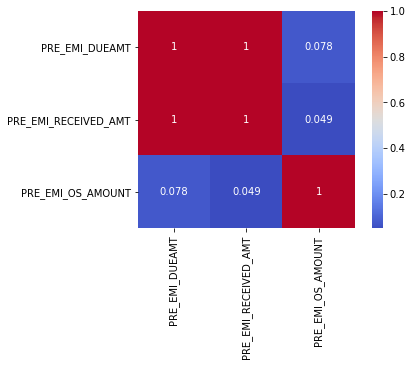

In [45]:
df2=df1.copy()
test_pre_emiamt =['PRE_EMI_DUEAMT','PRE_EMI_RECEIVED_AMT','PRE_EMI_OS_AMOUNT']
df2=df2[test_pre_emiamt]
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm',square=True)

#Insights: Pre-EMI Due amount & Pre EMI Received Amount are perfectly highly correlated, in the context of foreclosure the 'pre emi due amount' will be retained along with 'Pre Emi OS amount'

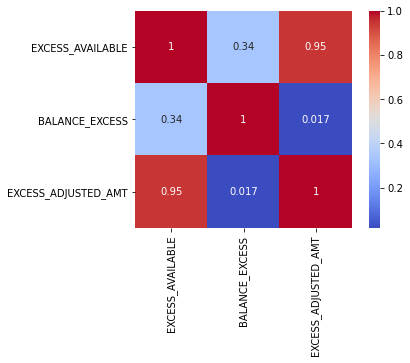

In [46]:
df2=df1.copy()
test_excess_amt =['EXCESS_AVAILABLE','BALANCE_EXCESS','EXCESS_ADJUSTED_AMT']
df2=df2[test_excess_amt]
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm',square=True)

#Insight: Excess Available and Excess Adjusted Amount are highly correlated, 'Excess Available' will be retained along with 'Balance Excess'

In [47]:
#Dropping un-necessary columns after correlation heat map charts & Columns which dont provide much information on Target variable.

Drop_variables = ['AUTHORIZATIONDATE','DIFF_AUTH_INT_DATE','DUEDAY','ORIGNAL_TENOR','CURRENT_TENOR','DIFF_ORIGINAL_CURRENT_TENOR','ORIGNAL_INTEREST_RATE','DIFF_ORIGINAL_CURRENT_INTEREST_RATE','CURRENT_INTEREST_RATE_MAX','CURRENT_INTEREST_RATE_MIN','DIFF_CURRENT_INTEREST_RATE_MAX_MIN','CURRENT_INTEREST_RATE_CHANGES','MAX_EMI_AMOUNT','MIN_EMI_AMOUNT','DIFF_EMI_AMOUNT_MAX_MIN','EMI_DUEAMT','PRE_EMI_RECEIVED_AMT','EXCESS_ADJUSTED_AMT','LATEST_TRANSACTION_MONTH','LAST_RECEIPT_DATE','LAST_RECEIPT_AMOUNT','MONTHOPENING']
df3 = df1.copy()
df3.drop(columns=Drop_variables,inplace=True)
print('After Correlation checks',df1.shape[1], 'variables are reduced to', df3.shape[1],'variables')


After Correlation checks 48 variables are reduced to 26 variables


In [48]:
df3.columns

Index(['AGREEMENTID', 'BALANCE_EXCESS', 'BALANCE_TENURE', 'CITY',
       'COMPLETED_TENURE', 'CURRENT_INTEREST_RATE', 'DPD', 'EMI_AMOUNT',
       'EMI_OS_AMOUNT', 'EMI_RECEIVED_AMT', 'EXCESS_AVAILABLE', 'FOIR',
       'INTEREST_START_DATE', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'NET_LTV',
       'NET_RECEIVABLE', 'NUM_EMI_CHANGES', 'NUM_LOW_FREQ_TRANSACTIONS',
       'OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL',
       'PRE_EMI_DUEAMT', 'PRE_EMI_OS_AMOUNT', 'PRODUCT', 'FORECLOSURE'],
      dtype='object')

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 0 to 20011
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AGREEMENTID                20012 non-null  int64         
 1   BALANCE_EXCESS             20012 non-null  float64       
 2   BALANCE_TENURE             20012 non-null  int64         
 3   CITY                       20012 non-null  object        
 4   COMPLETED_TENURE           20012 non-null  int64         
 5   CURRENT_INTEREST_RATE      20012 non-null  float64       
 6   DPD                        20012 non-null  int64         
 7   EMI_AMOUNT                 20012 non-null  float64       
 8   EMI_OS_AMOUNT              20012 non-null  float64       
 9   EMI_RECEIVED_AMT           20012 non-null  float64       
 10  EXCESS_AVAILABLE           20012 non-null  float64       
 11  FOIR                       20012 non-null  float64       
 12  INTE

In [50]:
cat_var = ['CITY','INTEREST_START_DATE','PRODUCT']
df4 = df3.copy()
df4.drop(columns=cat_var,inplace=True)

In [51]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 0 to 20011
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGREEMENTID                20012 non-null  int64  
 1   BALANCE_EXCESS             20012 non-null  float64
 2   BALANCE_TENURE             20012 non-null  int64  
 3   COMPLETED_TENURE           20012 non-null  int64  
 4   CURRENT_INTEREST_RATE      20012 non-null  float64
 5   DPD                        20012 non-null  int64  
 6   EMI_AMOUNT                 20012 non-null  float64
 7   EMI_OS_AMOUNT              20012 non-null  float64
 8   EMI_RECEIVED_AMT           20012 non-null  float64
 9   EXCESS_AVAILABLE           20012 non-null  float64
 10  FOIR                       20012 non-null  float64
 11  LOAN_AMT                   20012 non-null  float64
 12  NET_DISBURSED_AMT          20012 non-null  float64
 13  NET_LTV                    20012 non-null  flo

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [53]:
df4 = df4.drop('PRE_EMI_OS_AMOUNT', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,BALANCE_EXCESS,15714.5709
14,NET_RECEIVABLE,15657.2811
7,EMI_OS_AMOUNT,3704.7931
12,NET_DISBURSED_AMT,1357.5171
17,OUTSTANDING_PRINCIPAL,867.4918
11,LOAN_AMT,323.8924
8,EMI_RECEIVED_AMT,164.5269
0,AGREEMENTID,88.3374
18,PAID_INTEREST,87.6198
4,CURRENT_INTEREST_RATE,47.7414


In [54]:
df4 = df4.drop('BALANCE_EXCESS', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,NET_DISBURSED_AMT,1356.5062
16,OUTSTANDING_PRINCIPAL,865.4589
10,LOAN_AMT,323.7861
7,EMI_RECEIVED_AMT,163.8979
0,AGREEMENTID,88.3353
17,PAID_INTEREST,87.2480
3,CURRENT_INTEREST_RATE,47.7370
8,EXCESS_AVAILABLE,44.1745
1,BALANCE_TENURE,12.7670
5,EMI_AMOUNT,11.7088


In [55]:
df4 = df4.drop('NET_DISBURSED_AMT', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,LOAN_AMT,252.6829
15,OUTSTANDING_PRINCIPAL,223.0673
0,AGREEMENTID,88.3317
7,EMI_RECEIVED_AMT,62.5771
3,CURRENT_INTEREST_RATE,47.7359
16,PAID_INTEREST,41.4990
1,BALANCE_TENURE,12.7670
8,EXCESS_AVAILABLE,12.5170
5,EMI_AMOUNT,11.6896
11,NET_LTV,8.0324


In [56]:
df4 = df4.drop('LOAN_AMT', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,AGREEMENTID,88.2845
3,CURRENT_INTEREST_RATE,47.7347
7,EMI_RECEIVED_AMT,24.4935
15,PAID_INTEREST,23.2567
1,BALANCE_TENURE,12.7423
5,EMI_AMOUNT,11.1783
14,OUTSTANDING_PRINCIPAL,8.4852
10,NET_LTV,8.0297
13,NUM_LOW_FREQ_TRANSACTIONS,6.0930
12,NUM_EMI_CHANGES,4.8761


In [57]:
df4 = df4.drop('AGREEMENTID', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,EMI_RECEIVED_AMT,23.9519
14,PAID_INTEREST,22.4846
4,EMI_AMOUNT,11.1371
2,CURRENT_INTEREST_RATE,11.0045
0,BALANCE_TENURE,8.7083
13,OUTSTANDING_PRINCIPAL,8.3245
9,NET_LTV,6.7664
12,NUM_LOW_FREQ_TRANSACTIONS,6.0929
11,NUM_EMI_CHANGES,4.8752
1,COMPLETED_TENURE,4.0027


In [58]:
df4 = df4.drop('EMI_RECEIVED_AMT', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,CURRENT_INTEREST_RATE,10.9674
0,BALANCE_TENURE,8.6576
4,EMI_AMOUNT,7.1200
8,NET_LTV,6.7404
11,NUM_LOW_FREQ_TRANSACTIONS,6.0921
12,OUTSTANDING_PRINCIPAL,5.8386
10,NUM_EMI_CHANGES,4.8733
1,COMPLETED_TENURE,3.9872
13,PAID_INTEREST,2.8400
15,PRE_EMI_DUEAMT,2.1021


In [59]:
df4 = df4.drop('CURRENT_INTEREST_RATE', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,EMI_AMOUNT,6.9679
7,NET_LTV,6.3742
10,NUM_LOW_FREQ_TRANSACTIONS,6.0913
0,BALANCE_TENURE,5.8443
11,OUTSTANDING_PRINCIPAL,5.8186
9,NUM_EMI_CHANGES,4.7140
1,COMPLETED_TENURE,3.2839
12,PAID_INTEREST,2.7939
14,PRE_EMI_DUEAMT,2.1021
5,EXCESS_AVAILABLE,2.0673


In [60]:
df4 = df4.drop('EMI_AMOUNT', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,NET_LTV,6.3567
9,NUM_LOW_FREQ_TRANSACTIONS,6.0907
0,BALANCE_TENURE,5.7708
8,NUM_EMI_CHANGES,4.7048
1,COMPLETED_TENURE,3.2807
11,PAID_INTEREST,2.2765
13,PRE_EMI_DUEAMT,2.0941
10,OUTSTANDING_PRINCIPAL,2.0876
12,PAID_PRINCIPAL,2.0579
4,EXCESS_AVAILABLE,1.8934


In [61]:
df4 = df4.drop('NET_LTV', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,NUM_LOW_FREQ_TRANSACTIONS,6.0888
7,NUM_EMI_CHANGES,4.6680
1,COMPLETED_TENURE,3.2012
10,PAID_INTEREST,2.2765
0,BALANCE_TENURE,2.1130
12,PRE_EMI_DUEAMT,2.0929
9,OUTSTANDING_PRINCIPAL,2.0744
11,PAID_PRINCIPAL,2.0576
4,EXCESS_AVAILABLE,1.8820
2,DPD,1.6638


In [62]:
df4 = df4.drop('NUM_LOW_FREQ_TRANSACTIONS', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,COMPLETED_TENURE,2.5744
7,NUM_EMI_CHANGES,2.4403
9,PAID_INTEREST,2.2720
0,BALANCE_TENURE,2.1057
11,PRE_EMI_DUEAMT,2.0887
8,OUTSTANDING_PRINCIPAL,2.0731
10,PAID_PRINCIPAL,2.0575
4,EXCESS_AVAILABLE,1.8810
3,EMI_OS_AMOUNT,1.6284
2,DPD,1.5743


In [63]:
df4.shape

(20012, 13)

In [64]:
df4.columns

Index(['BALANCE_TENURE', 'COMPLETED_TENURE', 'DPD', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'FOIR', 'NET_RECEIVABLE', 'NUM_EMI_CHANGES',
       'OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL',
       'PRE_EMI_DUEAMT', 'FORECLOSURE'],
      dtype='object')

In [65]:
df4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE_TENURE,20012.0000,172.8246,64.0045,0.0000,136.0000,174.0000,216.0000,674.0000
COMPLETED_TENURE,20012.0000,17.2691,16.4863,0.0000,6.0000,12.0000,25.0000,98.0000
DPD,20012.0000,7.5741,66.0989,0.0000,0.0000,0.0000,0.0000,2054.0000
EMI_OS_AMOUNT,20012.0000,33297.3485,656131.1347,0.0000,0.0000,0.0000,0.0000,58995308.7953
EXCESS_AVAILABLE,20012.0000,438896.1929,4169759.3531,0.0000,0.0000,260.6091,3105.0088,284164207.0655
FOIR,20012.0000,27.9600,3871.0648,-170.3300,0.4100,0.5200,0.6800,547616.0000
NET_RECEIVABLE,20012.0000,-45439.1533,1348502.3128,-75345537.7245,-17.6684,0.0000,0.0000,38643502.1153
NUM_EMI_CHANGES,20012.0000,2.9498,2.6355,-1.0000,2.0000,2.0000,4.0000,33.0000
OUTSTANDING_PRINCIPAL,20012.0000,5212982.4025,11521352.5645,-0.7506,1428919.4555,2394655.3775,4551203.7397,381836715.3048
PAID_INTEREST,20012.0000,989054.6886,3026052.5285,0.0000,125331.9266,309724.8300,795467.9601,123036220.6464


In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,2

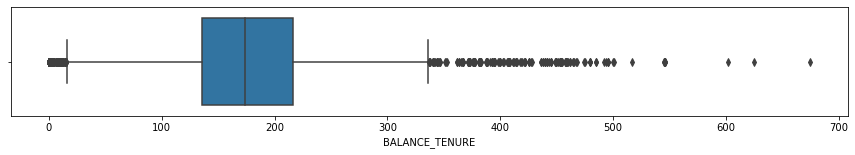

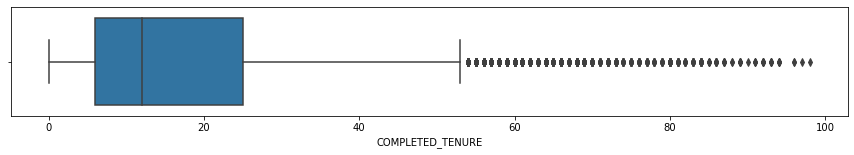

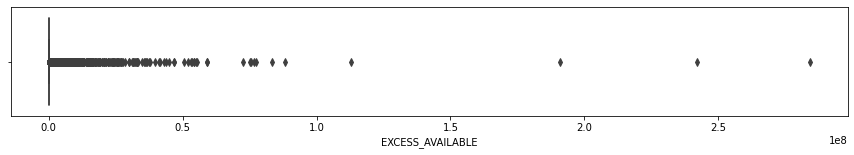

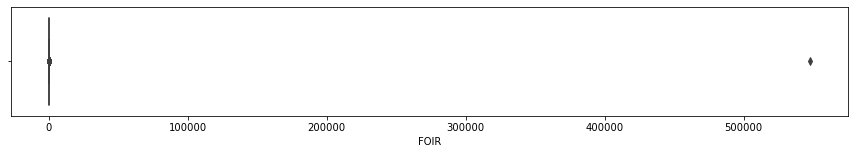

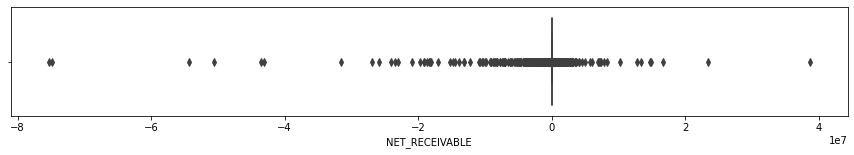

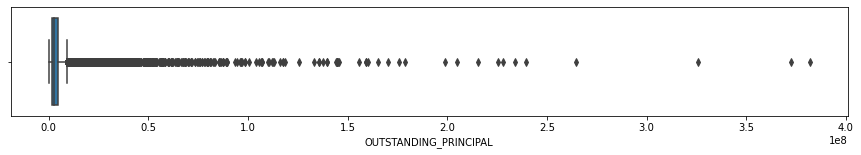

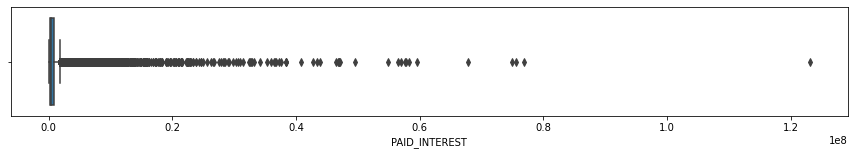

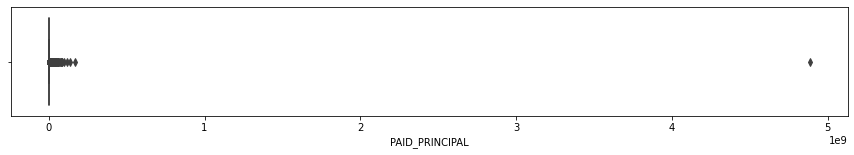

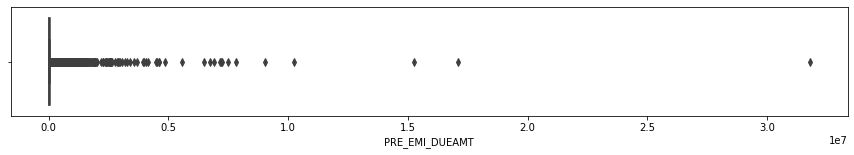

In [67]:
cols=['BALANCE_TENURE', 'COMPLETED_TENURE','EXCESS_AVAILABLE', 'FOIR', 'NET_RECEIVABLE','OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL',
       'PRE_EMI_DUEAMT'];

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [68]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [69]:
cols=['BALANCE_TENURE', 'COMPLETED_TENURE', 
       'EXCESS_AVAILABLE', 'FOIR', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL',
       'PRE_EMI_DUEAMT']
for column in cols:
    lr,ur=remove_outlier(df4[column])
    df4[column]=np.where(df4[column]>ur,ur,df4[column])
    df4[column]=np.where(df4[column]<lr,lr,df4[column])   

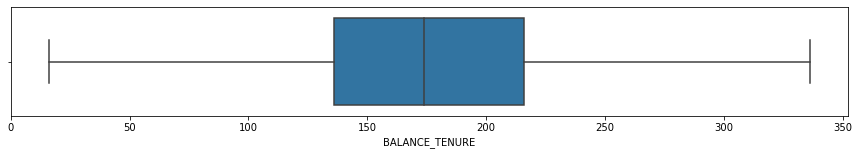

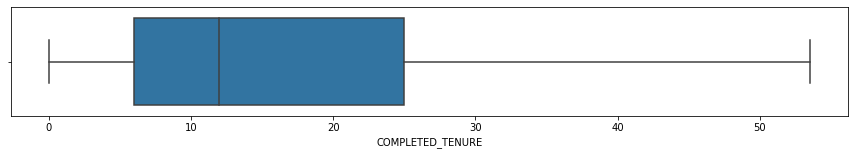

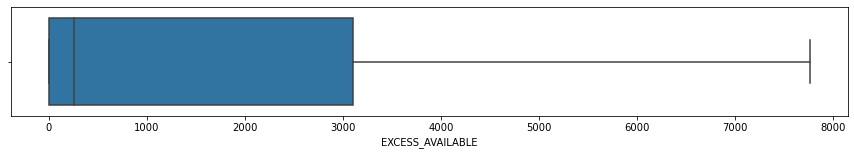

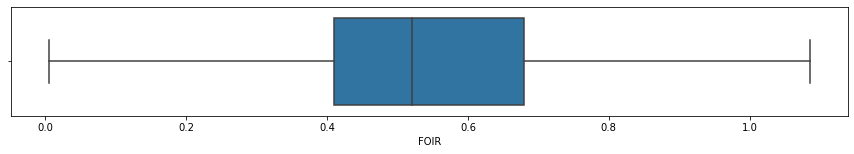

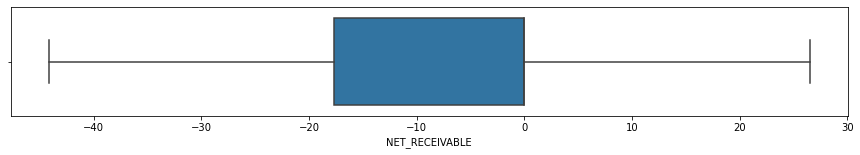

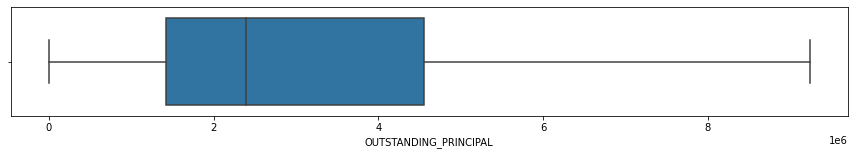

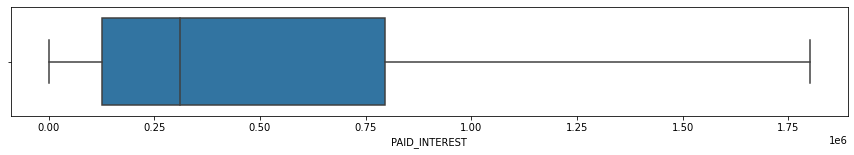

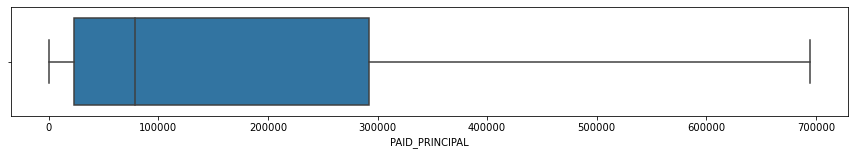

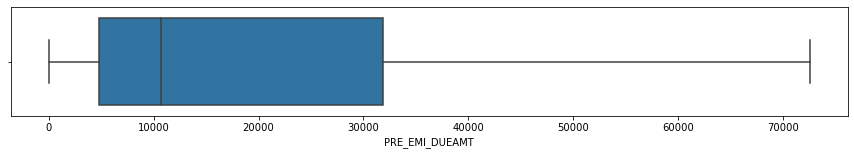

In [70]:
cols=['BALANCE_TENURE', 'COMPLETED_TENURE','EXCESS_AVAILABLE', 'FOIR', 'NET_RECEIVABLE','OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL',
       'PRE_EMI_DUEAMT'];

for i in cols:
    sns.boxplot(df4[i])
    plt.show()

In [71]:
#Derived Variables for these 3 variables
# 'DPD', 'EMI_OS_AMOUNT', 'NUM_EMI_CHANGES'

# DPD
bins = [0, 1, 30, 60, 90, 10000000]
slot = ['0-1','1-30','30-60','60-90','90 and above']
df4['DPD_RANGE'] = pd.cut(df4['DPD'], bins, labels=slot, include_lowest=True)
#print(df4['DPD_RANGE'].value_counts(dropna=False))
print(pd.crosstab(df4.DPD_RANGE, df4.FORECLOSURE,  margins=True))

#EMI_OS_AMT
bins = [0, 10000, 50000, 300000, 100000000000000]
slot = ['0-10k','10k-50k','50k-300K','300k and above']
df4['EMI_OSAMT_RANGE'] = pd.cut(df4['EMI_OS_AMOUNT'], bins, labels=slot, include_lowest=True)
#print(df4['EMI_OSAMT_RANGE'].value_counts(dropna=False))
print(pd.crosstab(df4.EMI_OSAMT_RANGE, df4.FORECLOSURE,  margins=True))

#NUM_EMI_CHANGES
bins = [-5, 2, 5,100]
slot = ['-5-2#','2-5#','5 and above']
df4['NUM_EMI_CHANGES_RANGE'] = pd.cut(df4['NUM_EMI_CHANGES'], bins, labels=slot, include_lowest=True)
#print(df4['NUM_EMI_CHANGES_RANGE'].value_counts(dropna=False))
print(pd.crosstab(df4.NUM_EMI_CHANGES_RANGE, df4.FORECLOSURE,  margins=True))

FORECLOSURE       0     1    All
DPD_RANGE                       
0-1           17113  1657  18770
1-30            546    59    605
30-60           217    22    239
60-90           148    26    174
90 and above    193    31    224
All           18217  1795  20012
FORECLOSURE          0     1    All
EMI_OSAMT_RANGE                    
0-10k            17153  1623  18776
10k-50k            346    62    408
50k-300K           492    79    571
300k and above     226    31    257
All              18217  1795  20012
FORECLOSURE                0     1    All
NUM_EMI_CHANGES_RANGE                    
-5-2#                  10880   916  11796
2-5#                    5276   583   5859
5 and above             2061   296   2357
All                    18217  1795  20012


In [72]:
df4.shape

(20012, 16)

In [73]:
col =['DPD', 'EMI_OS_AMOUNT', 'NUM_EMI_CHANGES']
df4 = df4.drop(col, axis = 1)

In [74]:
df4.shape

(20012, 13)

In [75]:
df4.describe().include='all'
df4.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,19982,19983,19984,19985,19986,19987,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000,20001,20002,20003,20004,20005,20006,20007,20008,20009,20010,20011
BALANCE_TENURE,16.0000,99.0000,231.0000,16.0000,215.0000,137.0000,294.0000,276.0000,145.0000,291.0000,16.0000,16.0000,16.0000,247.0000,128.0000,113.0000,111.0000,152.0000,118.0000,149.0000,295.0000,303.0000,274.0000,116.0000,284.0000,53.0000,132.0000,134.0000,227.0000,16.0000,...,240.0000,240.0000,240.0000,192.0000,240.0000,240.0000,240.0000,300.0000,180.0000,240.0000,180.0000,216.0000,240.0000,144.0000,180.0000,180.0000,132.0000,240.0000,240.0000,142.0000,180.0000,180.0000,180.0000,180.0000,228.0000,240.0000,240.0000,96.0000,60.0000,120.0000
COMPLETED_TENURE,45.0000,38.0000,53.5000,53.5000,53.5000,53.5000,53.5000,52.0000,53.5000,53.5000,49.0000,53.5000,53.5000,53.5000,53.5000,53.5000,53.5000,53.5000,53.5000,45.0000,53.5000,53.5000,41.0000,53.5000,53.5000,53.5000,35.0000,53.5000,46.0000,41.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
EXCESS_AVAILABLE,7762.5219,0.0000,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,0.0000,0.0000,7762.5219,7762.5219,0.0000,0.0000,2.2086,7762.5219,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4417,0.4417,0.4417,0.4417,0.8834,0.4417,0.4417,0.4417,0.4417,0.0000,35.3368,0.0000,0.0000,0.0000,0.0000,0.0000
FOIR,0.6000,0.6000,0.7200,0.6000,0.8300,0.6000,0.5500,0.6000,0.6000,0.6000,1.0600,0.5000,0.6000,0.6000,0.8900,0.6800,0.9000,0.9400,0.9400,0.5000,0.6000,0.8700,0.7500,0.4300,0.9088,0.5200,0.5200,0.6800,0.5600,0.2600,...,0.4100,0.4600,1.0200,0.4100,0.4800,0.5000,0.9800,0.5200,0.7100,0.5200,0.5400,0.5500,0.5400,0.7200,0.7300,0.6800,0.5000,0.8900,0.5500,0.8800,0.5800,0.4300,1.0850,0.5900,0.7400,0.8900,0.5600,0.6400,0.5400,0.2700
NET_RECEIVABLE,26.5026,26.5026,0.0000,26.5026,0.0000,26.5026,26.5026,26.5026,26.5026,26.5026,-1.6564,0.0000,0.0000,-0.4417,-0.7951,-44.1710,-0.0221,26.5026,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,26.5026,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.4417,-0.4417,-0.4417,-0.4417,-0.8834,-0.4417,26.5026,-0.4417,-0.4417,0.0000,-35.3368,0.0000,0.0000,0.0000,0.0000,0.0000
OUTSTANDING_PRINCIPAL,116447.2281,9234630.1661,2994183.5178,42951.2021,7200652.6148,769138.6097,5765533.2731,9234630.1661,928407.3279,890255.0629,144595.1431,135634.4640,-0.7506,2081217.7228,3043444.0506,6509594.7182,923960.5198,9234630.1661,9234630.1661,4337875.0863,7571028.4140,6646556.1024,9234630.1661,6433638.4137,9234630.1661,9234630.1661,9234630.1661,6513752.6470,5112739.4130,7510.8177,...,9234630.1661,791666.3038,6755831.1000,1992375.6614,4593965.1480,3753239.5000,9234630.1661,5224507.8827,2161865.9520,3002591.6000,442882.2610,4503887.4000,2221917.7840,4503887.4000,9234630.1661,7220159.3715,1824024.8542,7779761.3758,7506479.0000,7159160.2219,2176878.9100,2672644.3156,9234630.1661,7374800.3454,4744094.7280,9234630.1661,2299950.6358,9234630.1661,9234630.1661,9234630.1661
PAID_INTEREST,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,727393.5787,1800672.0104,1800672.0104,1800672.0104,980662.1802,1800672.0104,1800672.0104,1694234.0941,1166067.3172,1800672.0104,1800672.0104,1391330.4166,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,32635.1681,0.00

In [76]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 0 to 20011
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   BALANCE_TENURE         20012 non-null  float64 
 1   COMPLETED_TENURE       20012 non-null  float64 
 2   EXCESS_AVAILABLE       20012 non-null  float64 
 3   FOIR                   20012 non-null  float64 
 4   NET_RECEIVABLE         20012 non-null  float64 
 5   OUTSTANDING_PRINCIPAL  20012 non-null  float64 
 6   PAID_INTEREST          20012 non-null  float64 
 7   PAID_PRINCIPAL         20012 non-null  float64 
 8   PRE_EMI_DUEAMT         20012 non-null  float64 
 9   FORECLOSURE            20012 non-null  int64   
 10  DPD_RANGE              20012 non-null  category
 11  EMI_OSAMT_RANGE        20012 non-null  category
 12  NUM_EMI_CHANGES_RANGE  20012 non-null  category
dtypes: category(3), float64(9), int64(1)
memory usage: 2.4 MB


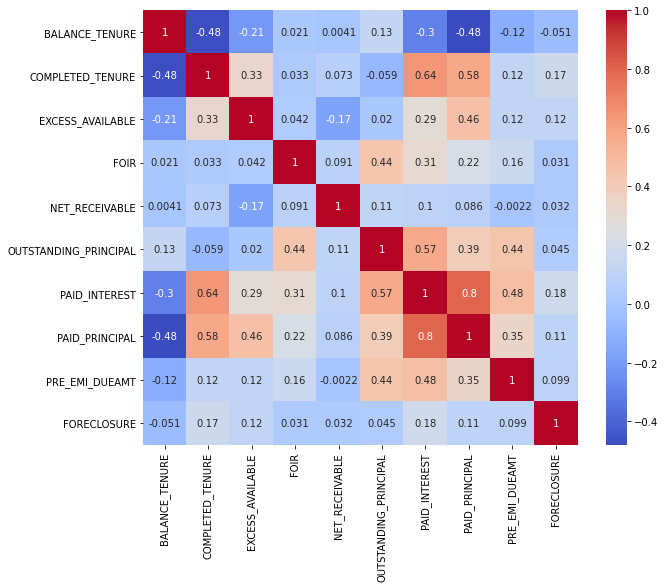

In [77]:
plt.figure(figsize=(10,8))  
sns.heatmap(df4.corr(), annot=True,cmap='coolwarm',square=True)

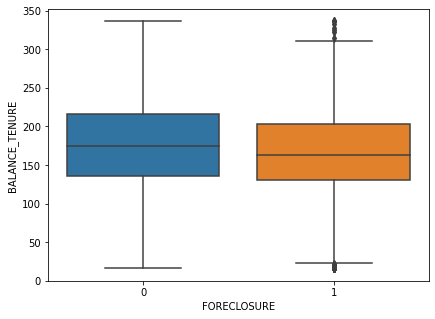

In [78]:
#Bivariate Analysis of final column variables vs Foreclosure Variable
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['BALANCE_TENURE'])

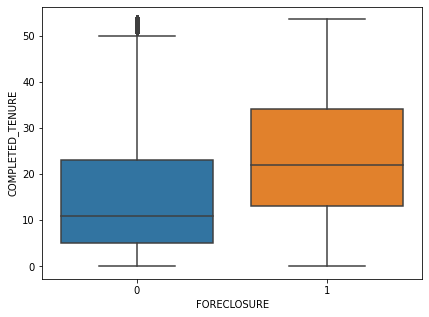

In [79]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['COMPLETED_TENURE'])

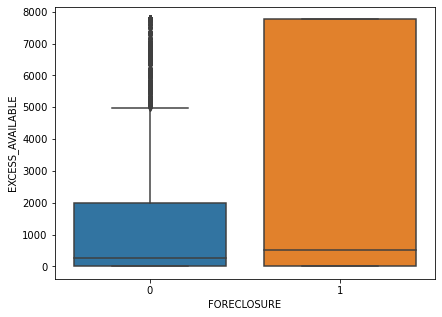

In [80]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['EXCESS_AVAILABLE'])

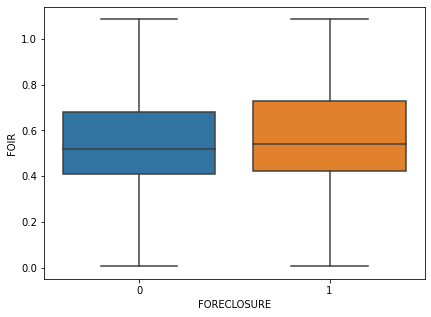

In [81]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['FOIR'])

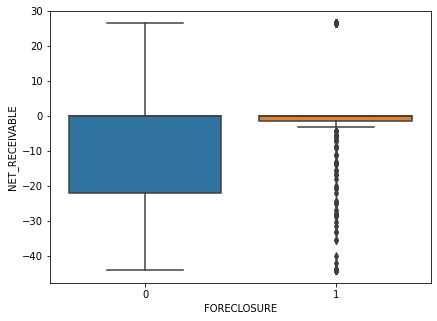

In [82]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['NET_RECEIVABLE'])

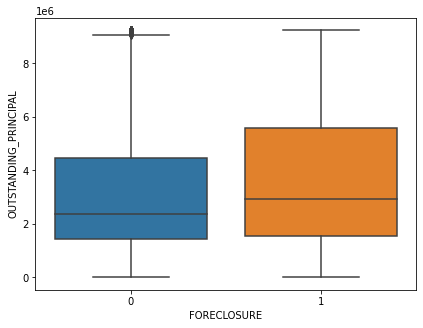

In [83]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['OUTSTANDING_PRINCIPAL'])

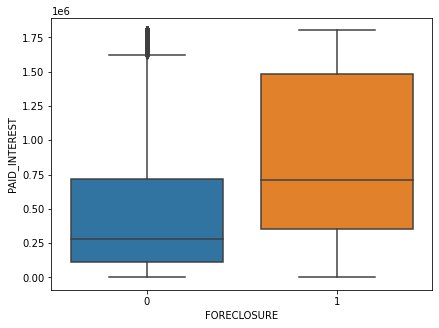

In [84]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['PAID_INTEREST'])

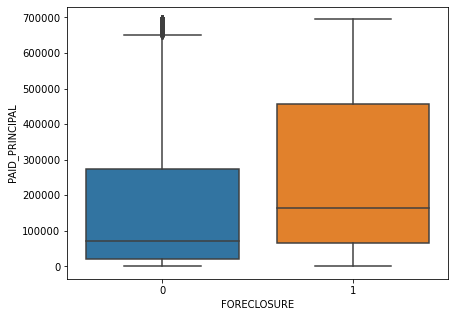

In [85]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['PAID_PRINCIPAL'])

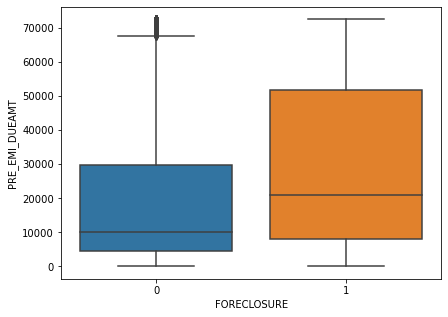

In [86]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['PRE_EMI_DUEAMT'])

In [87]:
#Final Variables for modelling
df5=df4.copy()
# final_vars=['COMPLETED_TENURE','NUM_EMI_CHANGES','PAID_INTEREST','BALANCE_TENURE','PRE_EMI_DUEAMT','OUTSTANDING_PRINCIPAL','PAID_PRINCIPAL','EXCESS_AVAILABLE','EMI_OS_AMOUNT','DPD','NET_RECEIVABLE','FOIR','FORECLOSURE']
# df5=df5[final_vars]
print(df5.shape)

(20012, 13)


In [88]:
df5.dtypes

BALANCE_TENURE            float64
COMPLETED_TENURE          float64
EXCESS_AVAILABLE          float64
FOIR                      float64
NET_RECEIVABLE            float64
OUTSTANDING_PRINCIPAL     float64
PAID_INTEREST             float64
PAID_PRINCIPAL            float64
PRE_EMI_DUEAMT            float64
FORECLOSURE                 int64
DPD_RANGE                category
EMI_OSAMT_RANGE          category
NUM_EMI_CHANGES_RANGE    category
dtype: object

In [89]:
#Hot encoding
'''
Converting all Category Dtypes to integers using CAT.codes
'''
df5['DPD_RANGE_CAT'] = df5['DPD_RANGE'].cat.codes
print(df5['DPD_RANGE_CAT'].value_counts())
df5['EMI_OSAMT_RANGE_CAT'] = df5['EMI_OSAMT_RANGE'].cat.codes
print(df5['EMI_OSAMT_RANGE_CAT'].value_counts())
df5['NUM_EMI_CHANGES_RANGE_CAT'] = df5['NUM_EMI_CHANGES_RANGE'].cat.codes
print(df5['NUM_EMI_CHANGES_RANGE_CAT'].value_counts())


0    18770
1      605
2      239
4      224
3      174
Name: DPD_RANGE_CAT, dtype: int64
0    18776
2      571
1      408
3      257
Name: EMI_OSAMT_RANGE_CAT, dtype: int64
0    11796
1     5859
2     2357
Name: NUM_EMI_CHANGES_RANGE_CAT, dtype: int64


In [90]:
print(df5.shape)
df5=df5.drop(columns=['DPD_RANGE','EMI_OSAMT_RANGE','NUM_EMI_CHANGES_RANGE'],axis=1)
print(df5.shape)

(20012, 16)
(20012, 13)


In [91]:
Insert_AGREEMENTID = df["AGREEMENTID"]
df6 = pd.concat([df5,Insert_AGREEMENTID], axis = 1)
df6

,BALANCE_TENURE,COMPLETED_TENURE,EXCESS_AVAILABLE,FOIR,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,FORECLOSURE,DPD_RANGE_CAT,EMI_OSAMT_RANGE_CAT,NUM_EMI_CHANGES_RANGE_CAT,AGREEMENTID
0,16.0000,45.0000,7762.5219,0.6000,26.5026,116447.2281,1800672.0104,694324.9114,7994.2736,1,0,2,0,11220001
1,99.0000,38.0000,0.0000,0.6000,26.5026,9234630.1661,1800672.0104,694324.9114,72544.5836,1,0,2,0,11220002
2,231.0000,53.5000,7762.5219,0.7200,0.0000,2994183.5178,1800672.0104,694324.9114,5947.6305,1,0,0,0,11220006
3,16.0000,53.5000,7762.5219,0.6000,26.5026,42951.2021,1800672.0104,694324.9114,60322.1808,1,0,2,1,11220008
4,215.0000,53.5000,7762.5219,0.8300,0.0000,7200652.6148,1800672.0104,555284.6979,27732.7875,1,0,0,0,11220010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,240.0000,0.0000,0.0000,0.8900,0.0000,9234630.1661,13813.4227,0.0000,20320.8870,0,0,0,0,11253349
20008,240.0000,0.0000,0.0000,0.5600,0.0000,2299950.6358,0.0000,0.0000,0.0000,0,0,0,0,11253350
20009,96.0000,0.0000,0.0000,0.6400,0.0000,9234630.1661,0.0000,0.0000,0.0000,0,0,0,0,11253351
20010,60.0000,0.0000,0.0000,0.5400,0.0000,9234630.1661,0.0000,0.0000,0.0000,0,0,0,0,11253353


In [92]:
Insert_CITY = df3["CITY"]
df6 = pd.concat([df6,Insert_CITY], axis = 1)
df6

,BALANCE_TENURE,COMPLETED_TENURE,EXCESS_AVAILABLE,FOIR,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,FORECLOSURE,DPD_RANGE_CAT,EMI_OSAMT_RANGE_CAT,NUM_EMI_CHANGES_RANGE_CAT,AGREEMENTID,CITY
0,16.0000,45.0000,7762.5219,0.6000,26.5026,116447.2281,1800672.0104,694324.9114,7994.2736,1,0,2,0,11220001,MUMBAI
1,99.0000,38.0000,0.0000,0.6000,26.5026,9234630.1661,1800672.0104,694324.9114,72544.5836,1,0,2,0,11220002,MUMBAI
2,231.0000,53.5000,7762.5219,0.7200,0.0000,2994183.5178,1800672.0104,694324.9114,5947.6305,1,0,0,0,11220006,MUMBAI
3,16.0000,53.5000,7762.5219,0.6000,26.5026,42951.2021,1800672.0104,694324.9114,60322.1808,1,0,2,1,11220008,THANE
4,215.0000,53.5000,7762.5219,0.8300,0.0000,7200652.6148,1800672.0104,555284.6979,27732.7875,1,0,0,0,11220010,MUMBAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,240.0000,0.0000,0.0000,0.8900,0.0000,9234630.1661,13813.4227,0.0000,20320.8870,0,0,0,0,11253349,PUNE
20008,240.0000,0.0000,0.0000,0.5600,0.0000,2299950.6358,0.0000,0.0000,0.0000,0,0,0,0,11253350,HYDERABAD
20009,96.0000,0.0000,0.0000,0.6400,0.0000,9234630.1661,0.0000,0.0000,0.0000,0,0,0,0,11253351,AHMEDABAD
20010,60.0000,0.0000,0.0000,0.5400,0.0000,9234630.1661,0.0000,0.0000,0.0000,0,0,0,0,11253353,BANGALORE


In [93]:
Insert_Other = df3[["PRODUCT","LOAN_AMT","NET_LTV"]]
df6 = pd.concat([df6,Insert_Other], axis = 1)
df6

,BALANCE_TENURE,COMPLETED_TENURE,EXCESS_AVAILABLE,FOIR,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,FORECLOSURE,DPD_RANGE_CAT,EMI_OSAMT_RANGE_CAT,NUM_EMI_CHANGES_RANGE_CAT,AGREEMENTID,CITY,PRODUCT,LOAN_AMT,NET_LTV
0,16.0000,45.0000,7762.5219,0.6000,26.5026,116447.2281,1800672.0104,694324.9114,7994.2736,1,0,2,0,11220001,MUMBAI,HL,11710107.2400,40.0600
1,99.0000,38.0000,0.0000,0.6000,26.5026,9234630.1661,1800672.0104,694324.9114,72544.5836,1,0,2,0,11220002,MUMBAI,HL,19290253.3236,84.3100
2,231.0000,53.5000,7762.5219,0.7200,0.0000,2994183.5178,1800672.0104,694324.9114,5947.6305,1,0,0,0,11220006,MUMBAI,HL,3933394.9960,50.8900
3,16.0000,53.5000,7762.5219,0.6000,26.5026,42951.2021,1800672.0104,694324.9114,60322.1808,1,0,2,1,11220008,THANE,HL,10022587.7064,84.6300
4,215.0000,53.5000,7762.5219,0.8300,0.0000,7200652.6148,1800672.0104,555284.6979,27732.7875,1,0,0,0,11220010,MUMBAI,HL,7755937.3127,30.9400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,240.0000,0.0000,0.0000,0.8900,0.0000,9234630.1661,13813.4227,0.0000,20320.8870,0,0,0,0,11253349,PUNE,HL,9251146.8595,65.0600
20008,240.0000,0.0000,0.0000,0.5600,0.0000,2299950.6358,0.0000,0.0000,0.0000,0,0,0,0,11253350,HYDERABAD,HL,2299950.6358,43.7100
20009,96.0000,0.0000,0.0000,0.6400,0.0000,9234630.1661,0.0000,0.0000,0.0000,0,0,0,0,11253351,AHMEDABAD,LAP,21018141.2000,12.2500
20010,60.0000,0.0000,0.0000,0.5400,0.0000,9234630.1661,0.0000,0.0000,0.0000,0,0,0,0,11253353,BANGALORE,LAP,61623778.7803,50.0400


In [94]:
df6.groupby(df6['CITY'].value_counts(normalize=True) > 0.05)['CITY'].count()

Series([], Name: CITY, dtype: int64)

In [95]:
df6[('CITY')].value_counts(normalize=True)


MUMBAI             0.1013
HYDERABAD          0.0783
AHMEDABAD          0.0698
SURAT              0.0695
PUNE               0.0601
                    ...  
VEPPAMPATTU        0.0000
CHAMRAJNAGAR       0.0000
VETTAIKARANPUDUR   0.0000
DAHANU             0.0000
HUSNABAD           0.0000
Name: CITY, Length: 272, dtype: float64

In [96]:
df6['CITY_NEW'] =  np.where(df6.CITY == 'MUMBAI', 'MUMBAI',
                            np.where(df6.CITY == 'HYDERABAD', 'HYDERABAD',
                                     np.where(df6.CITY == 'AHMEDABAD', 'AHMEDABAD',
                                     np.where(df6.CITY == 'SURAT', 'SURAT',
                                               np.where(df6.CITY == 'PUNE', 'PUNE',
                                                        np.where(df6.CITY == 'CHENNAI', 'CHENNAI',
                                                                 np.where(df6.CITY == 'BANGALORE', 'BANGALORE',
                                                                          np.where(df6.CITY == 'THANE', 'THANE',
                                                                                    np.where(df6.CITY == 'DELHI', 'DELHI',
                                                                                              np.where(df6.CITY == 'RAJKOT', 'RAJKOT',
                                                                                                        np.where(df6.CITY == 'NASHIK', 'NASHIK',
                                                                                                                  np.where(df6.CITY == 'COIMBATORE', 'COIMBATORE',
                                                                                                                           np.where(df6.CITY == 'NAGPUR', 'NAGPUR',
                                                                                                                                    np.where(df6.CITY == 'MADURAI', 'MADURAI',
                                                                                                                                             np.where(df6.CITY == 'VADODARA', 'VADODARA', 'OTHERS')))))))))))))))                    
                                                                                                                                                                                        
                                                                                                                                             
                                                                                                                                                                                                                                                      
                                        

In [97]:
df6.head()

,BALANCE_TENURE,COMPLETED_TENURE,EXCESS_AVAILABLE,FOIR,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,FORECLOSURE,DPD_RANGE_CAT,EMI_OSAMT_RANGE_CAT,NUM_EMI_CHANGES_RANGE_CAT,AGREEMENTID,CITY,PRODUCT,LOAN_AMT,NET_LTV,CITY_NEW
0,16.0000,45.0000,7762.5219,0.6000,26.5026,116447.2281,1800672.0104,694324.9114,7994.2736,1,0,2,0,11220001,MUMBAI,HL,11710107.2400,40.0600,MUMBAI
1,99.0000,38.0000,0.0000,0.6000,26.5026,9234630.1661,1800672.0104,694324.9114,72544.5836,1,0,2,0,11220002,MUMBAI,HL,19290253.3236,84.3100,MUMBAI
2,231.0000,53.5000,7762.5219,0.7200,0.0000,2994183.5178,1800672.0104,694324.9114,5947.6305,1,0,0,0,11220006,MUMBAI,HL,3933394.9960,50.8900,MUMBAI
3,16.0000,53.5000,7762.5219,0.6000,26.5026,42951.2021,1800672.0104,694324.9114,60322.1808,1,0,2,1,11220008,THANE,HL,10022587.7064,84.6300,THANE
4,215.0000,53.5000,7762.5219,0.8300,0.0000,7200652.6148,1800672.0104,555284.6979,27732.7875,1,0,0,0,11220010,MUMBAI,HL,7755937.3127,30.9400,MUMBAI


In [98]:
df6[('CITY_NEW')].value_counts(dropna = 'false')

OTHERS        6759
MUMBAI        2028
HYDERABAD     1567
AHMEDABAD     1396
SURAT         1391
PUNE          1202
CHENNAI       1001
BANGALORE      880
THANE          735
DELHI          623
RAJKOT         558
NASHIK         443
COIMBATORE     422
NAGPUR         385
MADURAI        326
VADODARA       296
Name: CITY_NEW, dtype: int64

In [99]:
pd.crosstab(df6.CITY_NEW, df6.FORECLOSURE,  margins=True)

FORECLOSURE,0,1,All
CITY_NEW,,,
AHMEDABAD,1306,90,1396
BANGALORE,799,81,880
CHENNAI,892,109,1001
COIMBATORE,353,69,422
DELHI,547,76,623
HYDERABAD,1402,165,1567
MADURAI,272,54,326
MUMBAI,1675,353,2028
NAGPUR,383,2,385


In [100]:
print(df6.shape)
df7=df6.drop(columns=['AGREEMENTID','CITY'],axis=1)
print(df7.shape)

(20012, 19)
(20012, 17)


In [101]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 0 to 20011
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BALANCE_TENURE             20012 non-null  float64
 1   COMPLETED_TENURE           20012 non-null  float64
 2   EXCESS_AVAILABLE           20012 non-null  float64
 3   FOIR                       20012 non-null  float64
 4   NET_RECEIVABLE             20012 non-null  float64
 5   OUTSTANDING_PRINCIPAL      20012 non-null  float64
 6   PAID_INTEREST              20012 non-null  float64
 7   PAID_PRINCIPAL             20012 non-null  float64
 8   PRE_EMI_DUEAMT             20012 non-null  float64
 9   FORECLOSURE                20012 non-null  int64  
 10  DPD_RANGE_CAT              20012 non-null  int8   
 11  EMI_OSAMT_RANGE_CAT        20012 non-null  int8   
 12  NUM_EMI_CHANGES_RANGE_CAT  20012 non-null  int8   
 13  PRODUCT                    20012 non-null  obj

In [102]:
df7['PRODUCT'] = df7['PRODUCT'].astype('category')
df7['CITY_NEW'] = df7['CITY_NEW'].astype('category')

In [103]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 0 to 20011
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   BALANCE_TENURE             20012 non-null  float64 
 1   COMPLETED_TENURE           20012 non-null  float64 
 2   EXCESS_AVAILABLE           20012 non-null  float64 
 3   FOIR                       20012 non-null  float64 
 4   NET_RECEIVABLE             20012 non-null  float64 
 5   OUTSTANDING_PRINCIPAL      20012 non-null  float64 
 6   PAID_INTEREST              20012 non-null  float64 
 7   PAID_PRINCIPAL             20012 non-null  float64 
 8   PRE_EMI_DUEAMT             20012 non-null  float64 
 9   FORECLOSURE                20012 non-null  int64   
 10  DPD_RANGE_CAT              20012 non-null  int8    
 11  EMI_OSAMT_RANGE_CAT        20012 non-null  int8    
 12  NUM_EMI_CHANGES_RANGE_CAT  20012 non-null  int8    
 13  PRODUCT                    2001

In [104]:
#Hot encoding
'''
Converting all Category Dtypes to integers using CAT.codes
'''
df7['PRODUCT'] = df7['PRODUCT'].cat.codes
print(df7['PRODUCT'].value_counts())
df7['CITY_NEW'] = df7['CITY_NEW'].cat.codes
print(df7['CITY_NEW'].value_counts())

2    7268
1    6226
0    3482
3    3036
Name: PRODUCT, dtype: int64
10    6759
7     2028
5     1567
0     1396
13    1391
11    1202
2     1001
1      880
14     735
4      623
12     558
9      443
3      422
8      385
6      326
15     296
Name: CITY_NEW, dtype: int64


In [105]:
X = df7.copy()
X.head()

,BALANCE_TENURE,COMPLETED_TENURE,EXCESS_AVAILABLE,FOIR,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,FORECLOSURE,DPD_RANGE_CAT,EMI_OSAMT_RANGE_CAT,NUM_EMI_CHANGES_RANGE_CAT,PRODUCT,LOAN_AMT,NET_LTV,CITY_NEW
0,16.0000,45.0000,7762.5219,0.6000,26.5026,116447.2281,1800672.0104,694324.9114,7994.2736,1,0,2,0,0,11710107.2400,40.0600,7
1,99.0000,38.0000,0.0000,0.6000,26.5026,9234630.1661,1800672.0104,694324.9114,72544.5836,1,0,2,0,0,19290253.3236,84.3100,7
2,231.0000,53.5000,7762.5219,0.7200,0.0000,2994183.5178,1800672.0104,694324.9114,5947.6305,1,0,0,0,0,3933394.9960,50.8900,7
3,16.0000,53.5000,7762.5219,0.6000,26.5026,42951.2021,1800672.0104,694324.9114,60322.1808,1,0,2,1,0,10022587.7064,84.6300,14
4,215.0000,53.5000,7762.5219,0.8300,0.0000,7200652.6148,1800672.0104,555284.6979,27732.7875,1,0,0,0,0,7755937.3127,30.9400,7


In [106]:
X = X.drop('FORECLOSURE', axis = 1)
predictors = X
response = df7['FORECLOSURE']

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(scaled_predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [110]:
print(X_train_S.shape)
print(X_test_S.shape)

(13408, 16)
(6604, 16)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [112]:
print(X_train.shape)
print(X_test.shape)

(13408, 16)
(6604, 16)


In [113]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0   0.9100
1   0.0900
Name: FORECLOSURE, dtype: float64
 
0   0.9100
1   0.0900
Name: FORECLOSURE, dtype: float64


In [114]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)
Xt_res, yt_res = sm.fit_resample(X_test, y_test)

In [115]:
X_smote = pd.concat([X_res, y_res], axis = 1)
Xt_smote = pd.concat([Xt_res, yt_res], axis = 1)

In [116]:
df7.groupby('FORECLOSURE').mean()

,BALANCE_TENURE,COMPLETED_TENURE,EXCESS_AVAILABLE,FOIR,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,DPD_RANGE_CAT,EMI_OSAMT_RANGE_CAT,NUM_EMI_CHANGES_RANGE_CAT,PRODUCT,LOAN_AMT,NET_LTV,CITY_NEW
FORECLOSURE,,,,,,,,,,,,,,,,
0,173.0476,15.9071,1949.7945,0.5587,-9.6027,3418548.9931,522451.8630,184840.1513,21544.9434,0.1205,0.1102,0.5159,1.5514,5886090.1051,51.1921,7.9550
1,162.2256,24.8019,3267.4875,0.5832,-7.2743,3855869.0183,887992.4854,271001.4702,29946.1719,0.1699,0.1744,0.6546,0.8958,6011682.5819,51.1598,7.2975


In [117]:
X_smote.groupby('FORECLOSURE').mean()

,BALANCE_TENURE,COMPLETED_TENURE,EXCESS_AVAILABLE,FOIR,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,DPD_RANGE_CAT,EMI_OSAMT_RANGE_CAT,NUM_EMI_CHANGES_RANGE_CAT,PRODUCT,LOAN_AMT,NET_LTV,CITY_NEW
FORECLOSURE,,,,,,,,,,,,,,,,
0,173.4009,15.9340,1941.2650,0.5600,-9.5297,3413435.1811,518975.7545,182894.7842,21488.1929,0.1192,0.1104,0.5096,1.5497,5826620.7613,51.2524,7.9729
1,163.2785,25.1257,3295.2627,0.5878,-6.8020,3925876.1950,904854.7920,271318.6708,30192.2641,0.1045,0.0961,0.3941,0.7586,6102864.0310,50.8861,6.9499


In [118]:
import statsmodels.formula.api as SM

In [119]:
train = pd.concat([X_train, y_train], axis = 1)
train_smote = pd.concat([X_res, y_res], axis = 1)
test_smote = pd.concat([Xt_res, yt_res], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [120]:
X_train.columns

Index(['BALANCE_TENURE', 'COMPLETED_TENURE', 'EXCESS_AVAILABLE', 'FOIR',
       'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_INTEREST',
       'PAID_PRINCIPAL', 'PRE_EMI_DUEAMT', 'DPD_RANGE_CAT',
       'EMI_OSAMT_RANGE_CAT', 'NUM_EMI_CHANGES_RANGE_CAT', 'PRODUCT',
       'LOAN_AMT', 'NET_LTV', 'CITY_NEW'],
      dtype='object')

In [121]:
f_1 = 'FORECLOSURE ~ LOAN_AMT + NET_LTV + BALANCE_TENURE + COMPLETED_TENURE + EXCESS_AVAILABLE + FOIR + NET_RECEIVABLE + OUTSTANDING_PRINCIPAL + PAID_INTEREST + PAID_PRINCIPAL + PRE_EMI_DUEAMT + DPD_RANGE_CAT + EMI_OSAMT_RANGE_CAT + NUM_EMI_CHANGES_RANGE_CAT + PRODUCT + CITY_NEW'

In [122]:
model_1 = SM.logit(formula = f_1, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.255549
         Iterations 7


In [123]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                13408
Model:                          Logit   Df Residuals:                    13391
Method:                           MLE   Df Model:                           16
Date:                Sun, 16 May 2021   Pseudo R-squ.:                  0.1516
Time:                        21:12:57   Log-Likelihood:                -3426.4
converged:                       True   LL-Null:                       -4038.5
Covariance Type:            nonrobust   LLR p-value:                9.124e-251
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.2769      0.223     -1.239      0.215      -0.715       0.161
LOAN_AMT                  -2.553e-08   5.98e-09     -4.268      0.000   -3.73e-08   -1.38e-08
NET_LTV                       0.0024      0.002      1.438      0.150      -0.001       0.006
BALANCE_TENURE               -0.0039      0.001     -5.140      0.000      -0.005      -0.002
COMPLETED_TENURE             -0.0003      0.004     -0.074      0.941      -0.008       0.007
EXCESS_AVAILABLE           6.132e-05   1.05e-05      5.833      0.000    4.07e-05    8.19e-05
FOIR                         -0.8686      0.149     -5.814      0.000      -1.161      -0.576
NET_RECEIVABLE                0.0035      0.002      1.785      0.074      -0.000       0.007
OUTSTANDING_PRINCIPAL     -1.165e-07   2.19e-08     -5.322      0.000   -1.59e-07   -7.36e-08
PAID_INTEREST              1.549e-06   1.33e-07     11.653      0.000    1.29e-06    1.81e-06
PAID_PRINCIPAL            -2.968e-06   2.94e-07    -10.103      0.000   -3.54e-06   -2.39e-06
PRE_EMI_DUEAMT             1.111e-05   1.54e-06      7.218      0.000    8.09e-06    1.41e-05
DPD_RANGE_CAT                -0.0045      0.103     -0.044      0.965      -0.206       0.197
EMI_OSAMT_RANGE_CAT          -0.0259      0.121     -0.214      0.830      -0.263       0.211
NUM_EMI_CHANGES_RANGE_CAT     0.1398      0.054      2.568      0.010       0.033       0.247
PRODUCT                      -0.9816      0.045    -21.731      0.000      -1.070      -0.893
CITY_NEW                     -0.0177      0.008     -2.212      0.027      -0.033      -0.002
=============================================================================================
"""

In [124]:
f_2 = 'FORECLOSURE ~ LOAN_AMT + NET_LTV + BALANCE_TENURE + COMPLETED_TENURE + EXCESS_AVAILABLE + FOIR + NET_RECEIVABLE + OUTSTANDING_PRINCIPAL + PAID_INTEREST + PAID_PRINCIPAL + PRE_EMI_DUEAMT + EMI_OSAMT_RANGE_CAT + NUM_EMI_CHANGES_RANGE_CAT + PRODUCT + CITY_NEW' # DPD_RANGE_CAT 

In [125]:
model_2 = SM.logit(formula = f_2, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.255549
         Iterations 7


In [126]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                13408
Model:                          Logit   Df Residuals:                    13392
Method:                           MLE   Df Model:                           15
Date:                Sun, 16 May 2021   Pseudo R-squ.:                  0.1516
Time:                        21:12:57   Log-Likelihood:                -3426.4
converged:                       True   LL-Null:                       -4038.5
Covariance Type:            nonrobust   LLR p-value:                9.934e-252
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.2770      0.223     -1.240      0.215      -0.715       0.161
LOAN_AMT                  -2.553e-08   5.98e-09     -4.268      0.000   -3.73e-08   -1.38e-08
NET_LTV                       0.0024      0.002      1.438      0.151      -0.001       0.006
BALANCE_TENURE               -0.0039      0.001     -5.145      0.000      -0.005      -0.002
COMPLETED_TENURE             -0.0003      0.004     -0.076      0.939      -0.008       0.007
EXCESS_AVAILABLE           6.132e-05   1.05e-05      5.833      0.000    4.07e-05    8.19e-05
FOIR                         -0.8687      0.149     -5.815      0.000      -1.162      -0.576
NET_RECEIVABLE                0.0034      0.002      1.785      0.074      -0.000       0.007
OUTSTANDING_PRINCIPAL     -1.165e-07   2.19e-08     -5.326      0.000   -1.59e-07   -7.36e-08
PAID_INTEREST               1.55e-06   1.33e-07     11.659      0.000    1.29e-06    1.81e-06
PAID_PRINCIPAL            -2.967e-06   2.93e-07    -10.126      0.000   -3.54e-06   -2.39e-06
PRE_EMI_DUEAMT             1.111e-05   1.54e-06      7.218      0.000    8.09e-06    1.41e-05
EMI_OSAMT_RANGE_CAT          -0.0303      0.068     -0.445      0.656      -0.164       0.103
NUM_EMI_CHANGES_RANGE_CAT     0.1395      0.054      2.577      0.010       0.033       0.246
PRODUCT                      -0.9817      0.045    -21.756      0.000      -1.070      -0.893
CITY_NEW                     -0.0177      0.008     -2.211      0.027      -0.033      -0.002
=============================================================================================
"""

In [127]:
f_3 = 'FORECLOSURE ~ LOAN_AMT + NET_LTV + BALANCE_TENURE + EXCESS_AVAILABLE + FOIR + NET_RECEIVABLE + OUTSTANDING_PRINCIPAL + PAID_INTEREST + PAID_PRINCIPAL + PRE_EMI_DUEAMT + EMI_OSAMT_RANGE_CAT + NUM_EMI_CHANGES_RANGE_CAT + PRODUCT + CITY_NEW' # COMPLETED_TENURE 

In [128]:
model_3 = SM.logit(formula = f_3, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.255549
         Iterations 7


In [129]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                13408
Model:                          Logit   Df Residuals:                    13393
Method:                           MLE   Df Model:                           14
Date:                Sun, 16 May 2021   Pseudo R-squ.:                  0.1516
Time:                        21:12:57   Log-Likelihood:                -3426.4
converged:                       True   LL-Null:                       -4038.5
Covariance Type:            nonrobust   LLR p-value:                1.046e-252
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.2838      0.205     -1.383      0.167      -0.686       0.118
LOAN_AMT                  -2.545e-08   5.89e-09     -4.323      0.000    -3.7e-08   -1.39e-08
NET_LTV                       0.0024      0.002      1.445      0.148      -0.001       0.006
BALANCE_TENURE               -0.0039      0.001     -5.171      0.000      -0.005      -0.002
EXCESS_AVAILABLE           6.126e-05   1.05e-05      5.845      0.000    4.07e-05    8.18e-05
FOIR                         -0.8681      0.149     -5.818      0.000      -1.161      -0.576
NET_RECEIVABLE                0.0034      0.002      1.783      0.075      -0.000       0.007
OUTSTANDING_PRINCIPAL     -1.158e-07   1.94e-08     -5.966      0.000   -1.54e-07   -7.77e-08
PAID_INTEREST              1.543e-06   9.82e-08     15.718      0.000    1.35e-06    1.74e-06
PAID_PRINCIPAL            -2.967e-06   2.93e-07    -10.129      0.000   -3.54e-06   -2.39e-06
PRE_EMI_DUEAMT             1.113e-05   1.51e-06      7.366      0.000    8.17e-06    1.41e-05
EMI_OSAMT_RANGE_CAT          -0.0309      0.068     -0.456      0.648      -0.164       0.102
NUM_EMI_CHANGES_RANGE_CAT     0.1390      0.054      2.590      0.010       0.034       0.244
PRODUCT                      -0.9812      0.045    -21.913      0.000      -1.069      -0.893
CITY_NEW                     -0.0177      0.008     -2.211      0.027      -0.033      -0.002
=============================================================================================
"""

In [130]:
f_4 = 'FORECLOSURE ~ LOAN_AMT + NET_LTV + BALANCE_TENURE + EXCESS_AVAILABLE + FOIR + NET_RECEIVABLE + OUTSTANDING_PRINCIPAL + PAID_INTEREST + PAID_PRINCIPAL + PRE_EMI_DUEAMT + NUM_EMI_CHANGES_RANGE_CAT + PRODUCT + CITY_NEW' # EMI_OSAMT_RANGE_CAT

In [131]:
model_4 = SM.logit(formula = f_4, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.255557
         Iterations 7


In [132]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                13408
Model:                          Logit   Df Residuals:                    13394
Method:                           MLE   Df Model:                           13
Date:                Sun, 16 May 2021   Pseudo R-squ.:                  0.1515
Time:                        21:12:57   Log-Likelihood:                -3426.5
converged:                       True   LL-Null:                       -4038.5
Covariance Type:            nonrobust   LLR p-value:                1.172e-253
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.2852      0.205     -1.390      0.164      -0.687       0.117
LOAN_AMT                  -2.548e-08   5.89e-09     -4.327      0.000    -3.7e-08   -1.39e-08
NET_LTV                       0.0023      0.002      1.423      0.155      -0.001       0.006
BALANCE_TENURE               -0.0039      0.001     -5.152      0.000      -0.005      -0.002
EXCESS_AVAILABLE           6.084e-05   1.04e-05      5.828      0.000    4.04e-05    8.13e-05
FOIR                         -0.8684      0.149     -5.820      0.000      -1.161      -0.576
NET_RECEIVABLE                0.0030      0.002      1.791      0.073      -0.000       0.006
OUTSTANDING_PRINCIPAL     -1.167e-07   1.93e-08     -6.047      0.000   -1.55e-07   -7.89e-08
PAID_INTEREST               1.54e-06    9.8e-08     15.718      0.000    1.35e-06    1.73e-06
PAID_PRINCIPAL            -2.954e-06   2.92e-07    -10.133      0.000   -3.53e-06   -2.38e-06
PRE_EMI_DUEAMT             1.121e-05    1.5e-06      7.462      0.000    8.26e-06    1.42e-05
NUM_EMI_CHANGES_RANGE_CAT     0.1303      0.050      2.596      0.009       0.032       0.229
PRODUCT                      -0.9828      0.045    -22.011      0.000      -1.070      -0.895
CITY_NEW                     -0.0177      0.008     -2.202      0.028      -0.033      -0.002
=============================================================================================
"""

# LOGISTIC REGRESSION - WITH DEFAULT CUTOFF 0.5


In [133]:
y_prob_pred_train = model_4.predict(train)

In [134]:
y_class_pred_train_logreg=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred_train_logreg.append(a)

In [135]:
from sklearn import metrics

In [136]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

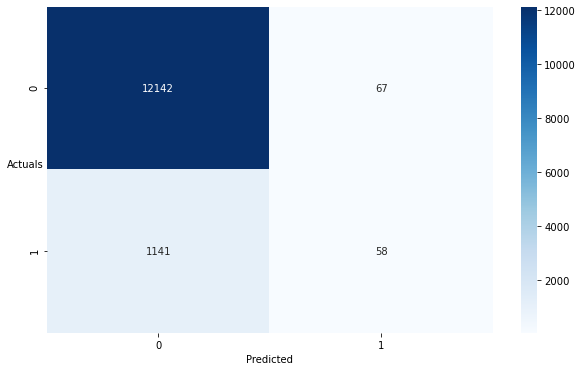

In [137]:
sns.heatmap((metrics.confusion_matrix(train['FORECLOSURE'],y_class_pred_train_logreg)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [138]:
print(metrics.classification_report(train['FORECLOSURE'],y_class_pred_train_logreg,digits=3))

              precision    recall  f1-score   support

           0      0.914     0.995     0.953     12209
           1      0.464     0.048     0.088      1199

    accuracy                          0.910     13408
   macro avg      0.689     0.521     0.520     13408
weighted avg      0.874     0.910     0.875     13408



AUC: 0.521


Text(0.5, 1.0, 'Logistic Regression - Train Data - Model with Default Cut-OFF point')

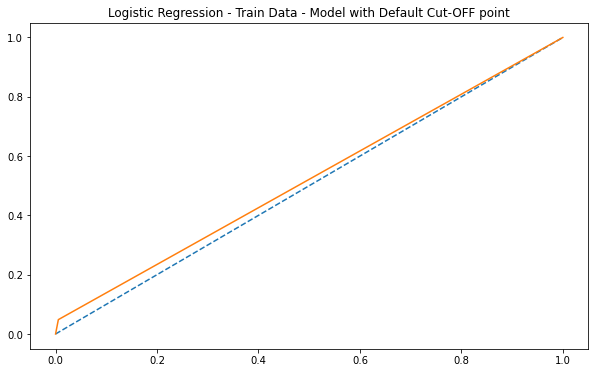

In [139]:
'''
 #AUC and ROC for the Train data - Model Developed on unbalanced data

'''
# calculate AUC
logreg_train_auc = roc_auc_score(train['FORECLOSURE'], y_class_pred_train_logreg)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
logreg_train_fpr, logreg_train_tpr, logreg_train_thresholds = roc_curve(train['FORECLOSURE'], y_class_pred_train_logreg)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_train_fpr, logreg_train_tpr)
plt.title('Logistic Regression - Train Data - Model with Default Cut-OFF point')

# LOGISTIC REGRESSION - WITH OPTIMUM CUTOFF

In [140]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train['FORECLOSURE'],y_prob_pred_train)

In [141]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.0931390732675977

In [142]:
y_class_pred_train_logreg_CO=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred_train_logreg_CO.append(a)

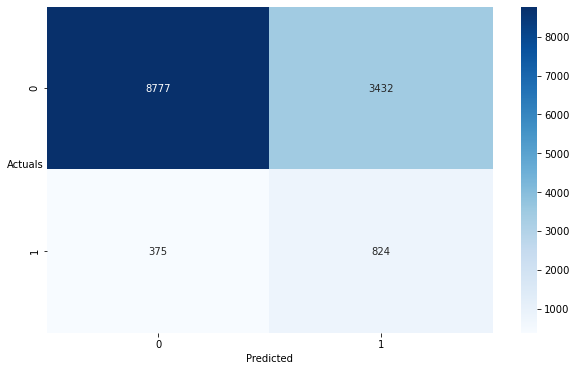

In [143]:
sns.heatmap((metrics.confusion_matrix(train['FORECLOSURE'],y_class_pred_train_logreg_CO)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [144]:
print(metrics.classification_report(train['FORECLOSURE'],y_class_pred_train_logreg_CO,digits=3))

              precision    recall  f1-score   support

           0      0.959     0.719     0.822     12209
           1      0.194     0.687     0.302      1199

    accuracy                          0.716     13408
   macro avg      0.576     0.703     0.562     13408
weighted avg      0.891     0.716     0.775     13408



AUC: 0.703


Text(0.5, 1.0, 'Logistic Regression - Train Data - Model with Optimal Cut-OFF point')

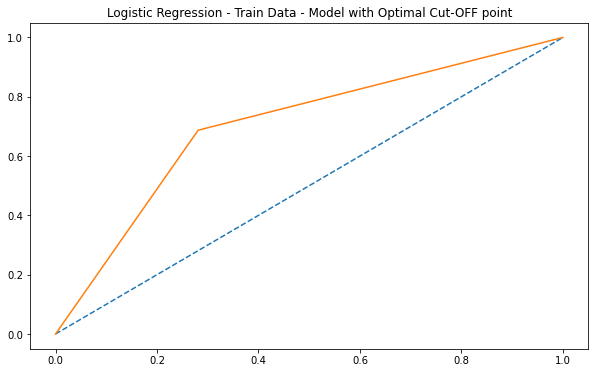

In [145]:
'''
 #AUC and ROC for the Train data - Model Developed on unbalanced data

'''
# calculate AUC
logreg_train_sm_auc = roc_auc_score(train['FORECLOSURE'], y_class_pred_train_logreg_CO)
print('AUC: %.3f' % logreg_train_sm_auc)
# calculate roc curve
logreg_sm_train_fpr, logreg_sm_train_tpr, logreg_sm_train_thresholds = roc_curve(train['FORECLOSURE'], y_class_pred_train_logreg_CO)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_sm_train_fpr, logreg_sm_train_tpr)
plt.title('Logistic Regression - Train Data - Model with Optimal Cut-OFF point')

In [146]:
y_prob_pred_test = model_4.predict(test)

In [147]:
y_class_pred_test_logreg_CO=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred_test_logreg_CO.append(a)

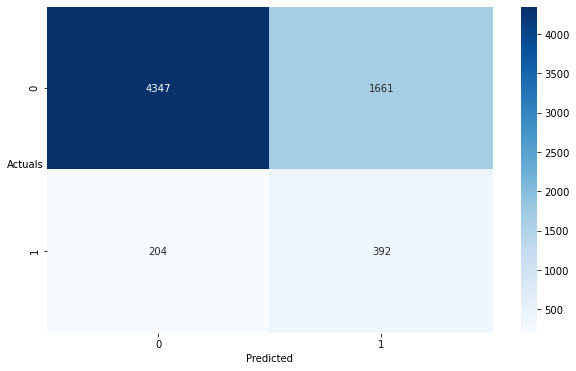

In [148]:
sns.heatmap((metrics.confusion_matrix(test['FORECLOSURE'],y_class_pred_test_logreg_CO)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [149]:
print(metrics.classification_report(test['FORECLOSURE'],y_class_pred_test_logreg_CO,digits=3))

              precision    recall  f1-score   support

           0      0.955     0.724     0.823      6008
           1      0.191     0.658     0.296       596

    accuracy                          0.718      6604
   macro avg      0.573     0.691     0.560      6604
weighted avg      0.886     0.718     0.776      6604



AUC: 0.691


Text(0.5, 1.0, 'Logistic Regression - Test Data - Model with Optimal Cut-OFF point')

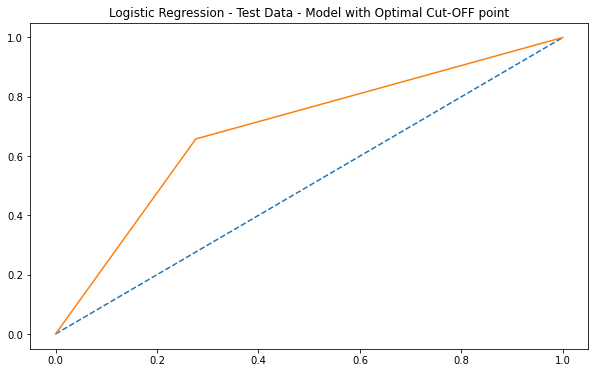

In [150]:
'''
#AUC and ROC for the Test data - Model on Balanced data

'''
# calculate AUC
logreg_test_sm_auc = roc_auc_score(test['FORECLOSURE'], y_class_pred_test_logreg_CO)
print('AUC: %.3f' % logreg_test_sm_auc)
# calculate roc curve
logreg_train_sm_fpr, logreg_train_sm_tpr, logreg_train_thresholds = roc_curve(test['FORECLOSURE'], y_class_pred_test_logreg_CO)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_train_sm_fpr, logreg_train_sm_tpr)
plt.title('Logistic Regression - Test Data - Model with Optimal Cut-OFF point')

# SMOTE DATA - Train - LOGISTIC REGRESSION

In [151]:
y_prob_pred_train_smote = model_4.predict(train_smote)

In [152]:
y_class_pred_train_SM=[]
for i in range(0,len(y_prob_pred_train_smote)):
    if np.array(y_prob_pred_train_smote)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred_train_SM.append(a)

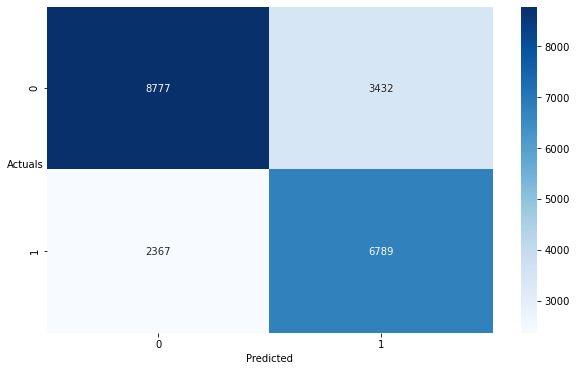

In [153]:
sns.heatmap((metrics.confusion_matrix(train_smote['FORECLOSURE'],y_class_pred_train_SM)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [154]:
print(metrics.classification_report(train_smote['FORECLOSURE'],y_class_pred_train_SM,digits=3))

              precision    recall  f1-score   support

           0      0.788     0.719     0.752     12209
           1      0.664     0.741     0.701      9156

    accuracy                          0.729     21365
   macro avg      0.726     0.730     0.726     21365
weighted avg      0.735     0.729     0.730     21365



AUC: 0.812


Text(0.5, 1.0, 'Logistic Regression - Train Data - Model on Smote Data')

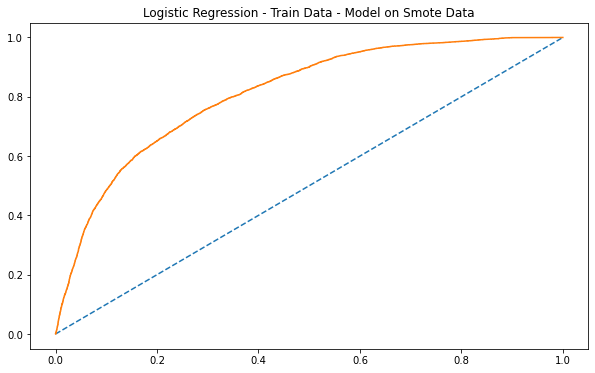

In [155]:
'''
 #AUC and ROC for the Train data - Model on SMOTE balanced data

'''
# calculate AUC
logreg_SM_train_auc = roc_auc_score(train_smote['FORECLOSURE'], y_prob_pred_train_smote)
print('AUC: %.3f' % logreg_SM_train_auc)
# calculate roc curve
logreg_train_SM_fpr, logreg_train_SM_tpr, logreg_train_SM_thresholds = roc_curve(train_smote['FORECLOSURE'], y_prob_pred_train_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_train_SM_fpr, logreg_train_SM_tpr)
plt.title('Logistic Regression - Train Data - Model on Smote Data')

# SMOTE DATA - Test - LOGISTIC REGRESSION¶

In [156]:
y_prob_pred_test_smote = model_4.predict(test_smote)

In [157]:
y_class_pred_test_SM=[]
for i in range(0,len(y_prob_pred_test_smote)):
    if np.array(y_prob_pred_test_smote)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred_test_SM.append(a)

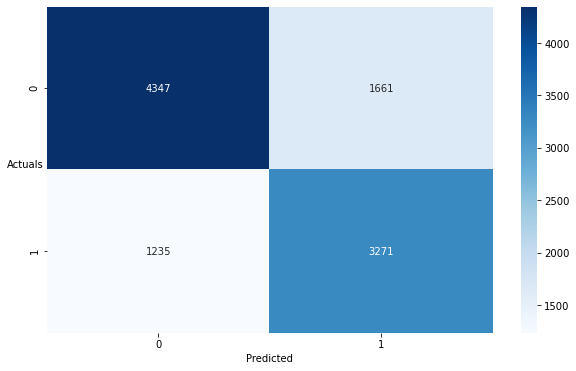

In [158]:
sns.heatmap((metrics.confusion_matrix(test_smote['FORECLOSURE'],y_class_pred_test_SM)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [159]:
print(metrics.classification_report(test_smote['FORECLOSURE'],y_class_pred_test_SM,digits=3))

              precision    recall  f1-score   support

           0      0.779     0.724     0.750      6008
           1      0.663     0.726     0.693      4506

    accuracy                          0.725     10514
   macro avg      0.721     0.725     0.722     10514
weighted avg      0.729     0.725     0.726     10514



AUC: 0.808


Text(0.5, 1.0, 'Logistic Regression - Test Data - Model on Smote Data')

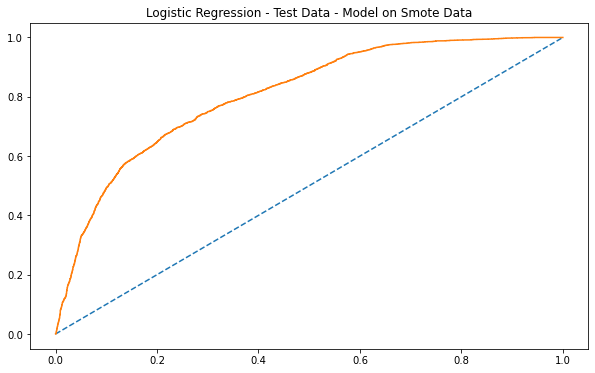

In [160]:
'''
 #AUC and ROC for the Test data - Model on SMOTE balanced data

'''
# calculate AUC
logreg_SM_test_auc = roc_auc_score(test_smote['FORECLOSURE'], y_prob_pred_test_smote)
print('AUC: %.3f' % logreg_SM_test_auc)
# calculate roc curve
logreg_test_SM_fpr, logreg_test_SM_tpr, logreg_test_SM_thresholds = roc_curve(test_smote['FORECLOSURE'], y_prob_pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_test_SM_fpr, logreg_test_SM_tpr)
plt.title('Logistic Regression - Test Data - Model on Smote Data')

# LDA - LINEAR DISCRMINANT ANALYSIS

In [161]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [162]:
LDA = LinearDiscriminantAnalysis()

In [163]:
lda_model = LDA.fit(X_train, y_train)

In [164]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [165]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12209
           1       0.39      0.12      0.18      1199

    accuracy                           0.90     13408
   macro avg       0.66      0.55      0.57     13408
weighted avg       0.87      0.90      0.88     13408



In [166]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6008
           1       0.37      0.10      0.16       596

    accuracy                           0.90      6604
   macro avg       0.64      0.54      0.55      6604
weighted avg       0.87      0.90      0.88      6604



In [167]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

AUC: 0.785


Text(0.5, 1.0, 'LDA - Train Data - Model on unbalanced Data')

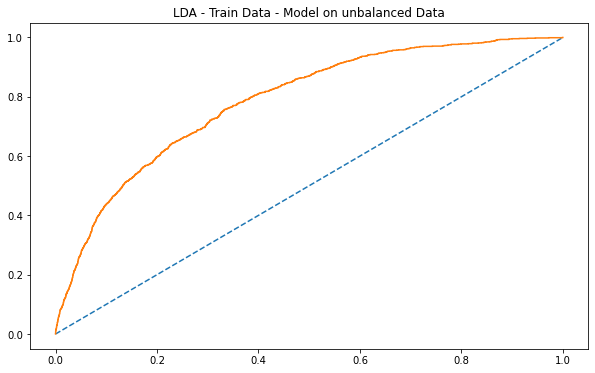

In [168]:
'''
 #AUC and ROC for the Train data - Model on unbalanced data

'''
# calculate AUC
lda_train_auc = roc_auc_score(train['FORECLOSURE'], pred_train_lda_prob)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train['FORECLOSURE'], pred_train_lda_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)
plt.title('LDA - Train Data - Model on unbalanced Data')

AUC: 0.772


Text(0.5, 1.0, 'LDA - Test Data - Model on unbalanced Data')

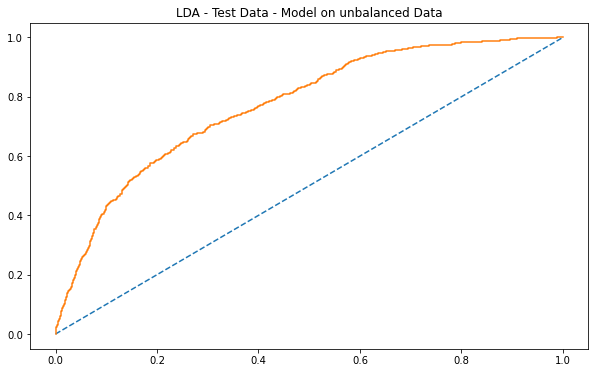

In [169]:
'''
 #AUC and ROC for the Test data - Model on unbalanced data

'''
# calculate AUC
lda_test_auc = roc_auc_score(test['FORECLOSURE'], pred_test_lda_prob)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(test['FORECLOSURE'], pred_test_lda_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)
plt.title('LDA - Test Data - Model on unbalanced Data')

In [170]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [171]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.06781207315838195

In [172]:
y_class_pred_OCO=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred_OCO.append(a)

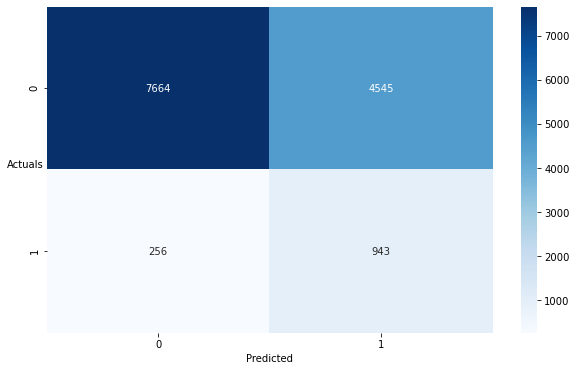

In [173]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred_OCO)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [174]:
print(metrics.classification_report(y_train, y_class_pred_OCO,digits=3))

              precision    recall  f1-score   support

           0      0.968     0.628     0.761     12209
           1      0.172     0.786     0.282      1199

    accuracy                          0.642     13408
   macro avg      0.570     0.707     0.522     13408
weighted avg      0.897     0.642     0.719     13408



AUC: 0.707


Text(0.5, 1.0, 'LDA - Train Data - Model with Optimal Cut OFF')

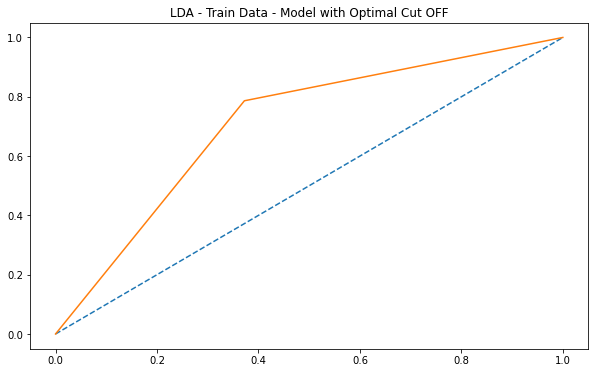

In [175]:
'''
 #AUC and ROC for the Train data - Model on unbalanced data

'''
# calculate AUC
lda_train_OCO_auc = roc_auc_score(train['FORECLOSURE'], y_class_pred_OCO)
print('AUC: %.3f' % lda_train_OCO_auc)
# calculate roc curve
lda_train_OCO_fpr, lda_train_OCO_tpr, lda_train_OCO_thresholds = roc_curve(train['FORECLOSURE'], y_class_pred_OCO)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_OCO_fpr, lda_train_OCO_tpr)
plt.title('LDA - Train Data - Model with Optimal Cut OFF')

In [176]:
y_class_pred_test_CO=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred_test_CO.append(a)

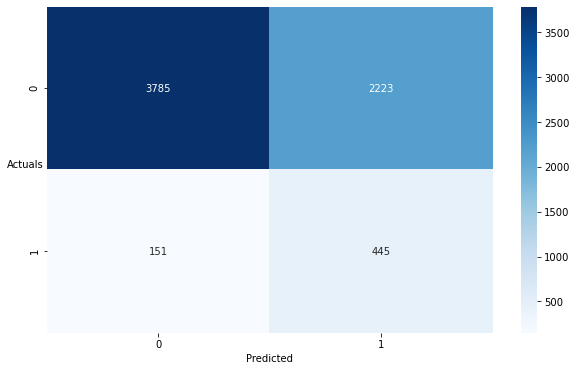

In [177]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred_test_CO)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [178]:
print(metrics.classification_report(y_test, y_class_pred_test_CO,digits=3))

              precision    recall  f1-score   support

           0      0.962     0.630     0.761      6008
           1      0.167     0.747     0.273       596

    accuracy                          0.641      6604
   macro avg      0.564     0.688     0.517      6604
weighted avg      0.890     0.641     0.717      6604



AUC: 0.688


Text(0.5, 1.0, 'LDA - Test Data - Model with Optimal Cut OFF')

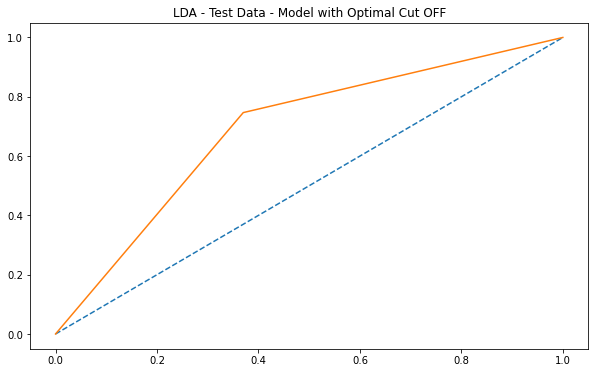

In [179]:
'''
 #AUC and ROC for the Test data - Model on unbalanced data

'''
# calculate AUC
lda_test_OCO_auc = roc_auc_score(test['FORECLOSURE'], y_class_pred_test_CO)
print('AUC: %.3f' % lda_test_OCO_auc)
# calculate roc curve
lda_test_OCO_fpr, lda_test_OCO_tpr, lda_test_OCO_thresholds = roc_curve(test['FORECLOSURE'], y_class_pred_test_CO)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_OCO_fpr, lda_test_OCO_tpr)
plt.title('LDA - Test Data - Model with Optimal Cut OFF')

# LDA ON SMOTE DATASET

In [180]:
pred_train_smote_lda = lda_model.predict(X_res)

In [181]:
print(metrics.classification_report(y_res, pred_train_smote_lda))

              precision    recall  f1-score   support

           0       0.60      0.98      0.74     12209
           1       0.82      0.11      0.20      9156

    accuracy                           0.61     21365
   macro avg       0.71      0.55      0.47     21365
weighted avg       0.69      0.61      0.51     21365



In [182]:
pred_train_smote_lda_prob = lda_model.predict_proba(X_res)[:,1]

In [183]:
fpr, tpr, thresholds = roc_curve(y_res,pred_train_smote_lda_prob)

In [184]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.06781128429718061

In [185]:
y_class_pred_train_SM=[]
for i in range(0,len(pred_train_smote_lda_prob)):
    if np.array(pred_train_smote_lda_prob)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred_train_SM.append(a)

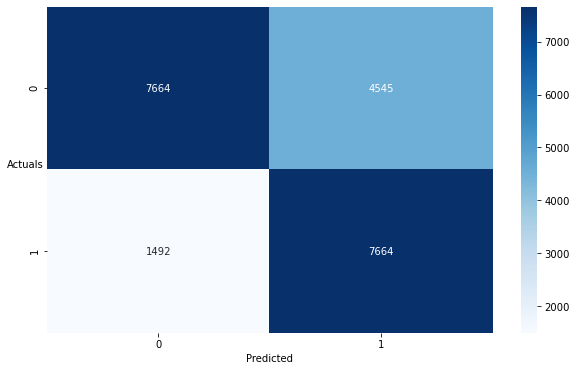

In [186]:
sns.heatmap((metrics.confusion_matrix(y_res, y_class_pred_train_SM)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [187]:
print(metrics.classification_report(y_res, y_class_pred_train_SM,digits=3))

              precision    recall  f1-score   support

           0      0.837     0.628     0.717     12209
           1      0.628     0.837     0.717      9156

    accuracy                          0.717     21365
   macro avg      0.732     0.732     0.717     21365
weighted avg      0.747     0.717     0.717     21365



AUC: 0.732


Text(0.5, 1.0, 'LDA - Train - SMOTE Adjusted- Model with Optimal Cut OFF')

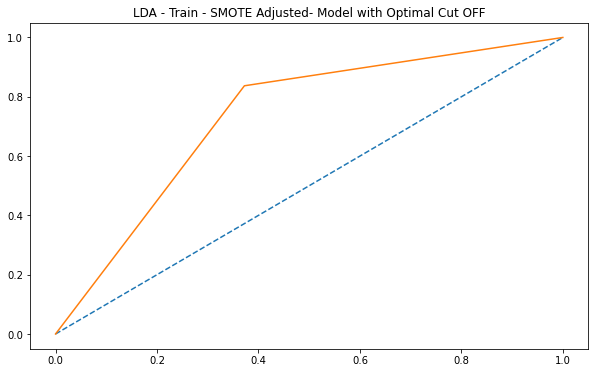

In [188]:
'''
 #AUC and ROC for the Train data - Model on SMOTE balanced data

'''
# calculate AUC
lda_train_SM_OCO_auc = roc_auc_score(train_smote['FORECLOSURE'], y_class_pred_train_SM)
print('AUC: %.3f' % lda_train_SM_OCO_auc)
# calculate roc curve
lda_train_SM_OCO_fpr, lda_train_SM_OCO_tpr, lda_train_SM_OCO_thresholds = roc_curve(train_smote['FORECLOSURE'], y_class_pred_train_SM)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_SM_OCO_fpr, lda_train_SM_OCO_tpr)
plt.title('LDA - Train - SMOTE Adjusted- Model with Optimal Cut OFF')

# RANDOM FOREST MODEL

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [190]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [191]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 200}

In [192]:
best_grid_rf = grid_search_rf.best_estimator_

In [193]:
best_grid_rf

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=200)

In [194]:
ytrain_predict = best_grid_rf.predict(X_train)
ytest_predict = best_grid_rf.predict(X_test)

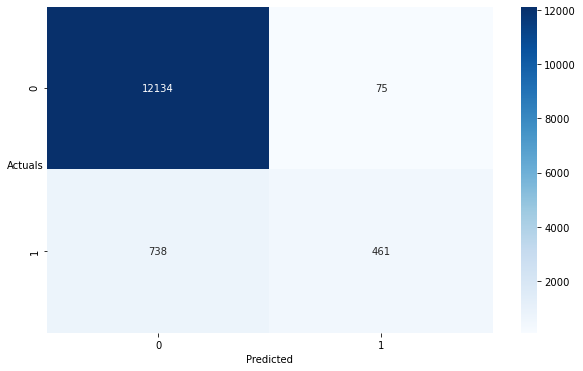

In [195]:
sns.heatmap((metrics.confusion_matrix(train['FORECLOSURE'],ytrain_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [196]:
rf_train_acc=best_grid_rf.score(X_train,y_train) 
rf_train_acc

0.9393645584725537

In [197]:
print(metrics.classification_report(train['FORECLOSURE'],ytrain_predict,digits=3))

              precision    recall  f1-score   support

           0      0.943     0.994     0.968     12209
           1      0.860     0.384     0.531      1199

    accuracy                          0.939     13408
   macro avg      0.901     0.689     0.749     13408
weighted avg      0.935     0.939     0.929     13408



Area under Curve is 0.6891720316524999


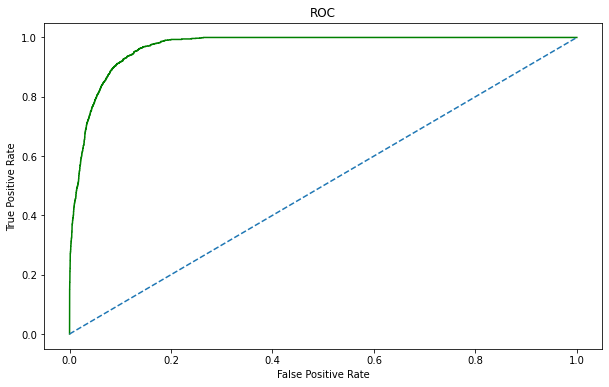

In [198]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_train_fpr, rf_train_tpr,_=roc_curve(train['FORECLOSURE'],best_grid_rf.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train['FORECLOSURE'],best_grid_rf.predict(X_train))
print('Area under Curve is', rf_train_auc)

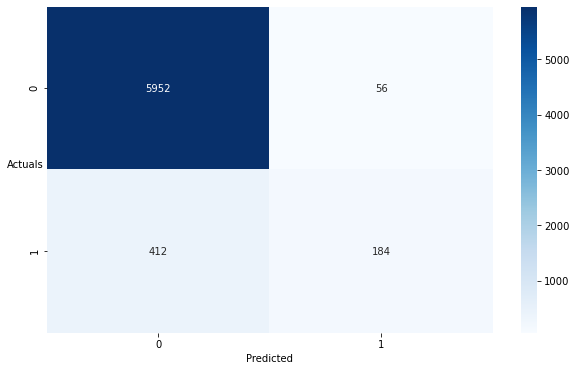

In [199]:
sns.heatmap((metrics.confusion_matrix(test['FORECLOSURE'],ytest_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [200]:
rf_test_acc=best_grid_rf.score(X_test,y_test) 
rf_test_acc

0.9291338582677166

In [201]:
print(metrics.classification_report(test['FORECLOSURE'],ytest_predict,digits=3))

              precision    recall  f1-score   support

           0      0.935     0.991     0.962      6008
           1      0.767     0.309     0.440       596

    accuracy                          0.929      6604
   macro avg      0.851     0.650     0.701      6604
weighted avg      0.920     0.929     0.915      6604



Area under Curve is 0.6497019633776888


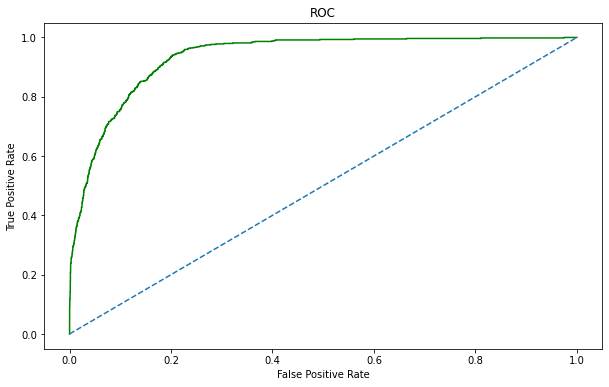

In [202]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_test_fpr, rf_test_tpr,_=roc_curve(test['FORECLOSURE'],best_grid_rf.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test['FORECLOSURE'],best_grid_rf.predict(X_test))
print('Area under Curve is', rf_test_auc)

# RF MODEL ON SMOTE DATASET

In [203]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier()

grid_search1 = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [204]:
grid_search1.fit(X_res, y_res)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [205]:
grid_search1.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 300}

In [206]:
best_grid1 = grid_search1.best_estimator_

In [207]:
best_grid1

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=300)

In [208]:
y_res_predict = best_grid1.predict(X_res)

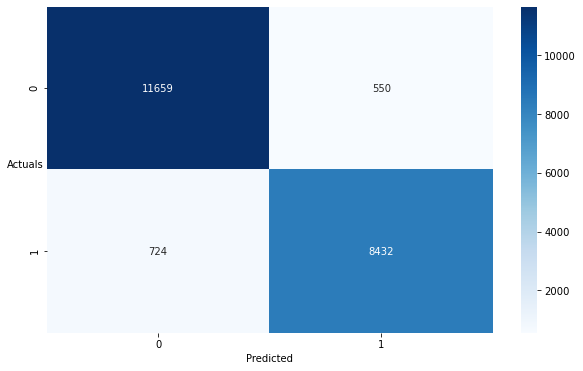

In [209]:
sns.heatmap((metrics.confusion_matrix(train_smote['FORECLOSURE'],y_res_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [210]:
rf_train_smote_acc=best_grid1.score(X_res,y_res) 
rf_train_smote_acc

0.9403697636321086

In [211]:
print(metrics.classification_report(train_smote['FORECLOSURE'],y_res_predict,digits=3))

              precision    recall  f1-score   support

           0      0.942     0.955     0.948     12209
           1      0.939     0.921     0.930      9156

    accuracy                          0.940     21365
   macro avg      0.940     0.938     0.939     21365
weighted avg      0.940     0.940     0.940     21365



In [212]:
rf_metrics=metrics.classification_report(train_smote['FORECLOSURE'], y_res_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_smote_precision=round(df.loc["1"][0],2)
rf_train_smote_recall=round(df.loc["1"][1],2)
rf_train_smote_f1=round(df.loc["1"][2],2)
print ('rf_train_smote_precision ',rf_train_smote_precision)
print ('rf_train_smote_recall ',rf_train_smote_recall)
print ('rf_train_smote_f1 ',rf_train_smote_f1)

rf_train_smote_precision  0.94
rf_train_smote_recall  0.92
rf_train_smote_f1  0.93


Area under Curve is 0.9379387170462486


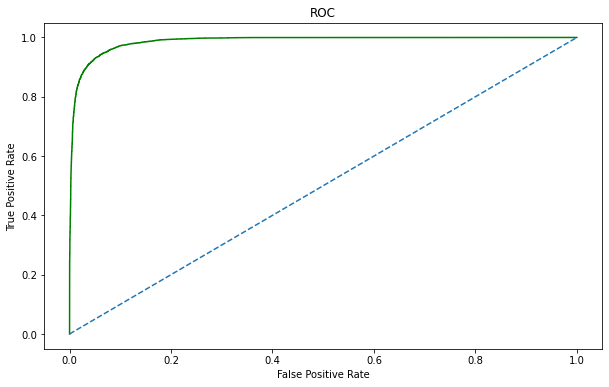

In [213]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_train_smote_fpr, rf_train_smote_tpr,_=roc_curve(train_smote['FORECLOSURE'],best_grid1.predict_proba(X_res)[:,1])
plt.plot(rf_train_smote_fpr,rf_train_smote_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_smote_auc=roc_auc_score(train_smote['FORECLOSURE'],best_grid1.predict(X_res))
print('Area under Curve is', rf_train_smote_auc)

# KNN - K Nearest Neighbours

In [214]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
model=KNN_model.fit(X_train,y_train)

In [215]:
# Performance Matrix on train data set
knn_y_train_predict = model.predict(X_train)
print(metrics.classification_report(y_train, knn_y_train_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     12209
           1       0.69      0.17      0.27      1199

    accuracy                           0.92     13408
   macro avg       0.81      0.58      0.61     13408
weighted avg       0.90      0.92      0.90     13408



Area under Curve is 0.5793000159646513


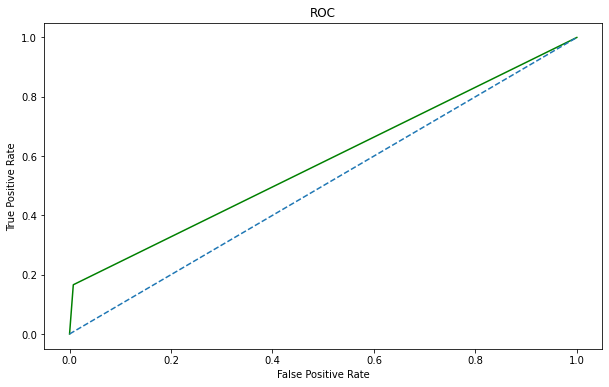

In [216]:
from sklearn.metrics import roc_curve,roc_auc_score
knn_train_fpr, knn_train_tpr,_=roc_curve(train['FORECLOSURE'],knn_y_train_predict)
plt.plot(knn_train_fpr,knn_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_train_auc=roc_auc_score(train['FORECLOSURE'],knn_y_train_predict)
print('Area under Curve is', knn_train_auc)

In [217]:
# Performance Matrix on Test data set
knn_y_test_predict = model.predict(X_test)
print(metrics.classification_report(y_test, knn_y_test_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6008
           1       0.27      0.05      0.09       596

    accuracy                           0.90      6604
   macro avg       0.59      0.52      0.52      6604
weighted avg       0.86      0.90      0.87      6604



Area under Curve is 0.5196885137490058


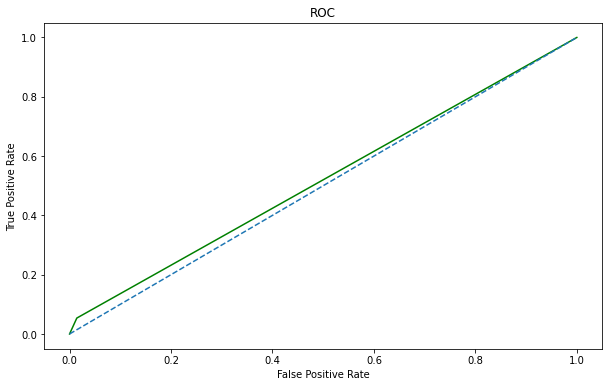

In [218]:
from sklearn.metrics import roc_curve,roc_auc_score
knn_test_fpr, knn_test_tpr,_=roc_curve(test['FORECLOSURE'],knn_y_test_predict)
plt.plot(knn_test_fpr,knn_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_test_auc=roc_auc_score(test['FORECLOSURE'],knn_y_test_predict)
print('Area under Curve is', knn_test_auc)

# KNN on SMOTE

In [219]:
from sklearn.neighbors import KNeighborsClassifier
KNN_SM_model=KNeighborsClassifier()
model=KNN_SM_model.fit(X_res,y_res)

In [220]:
# Performance Matrix on SMOTE train data set
knn_SM_train_predict = model.predict(X_res)
print(metrics.classification_report(y_res, knn_SM_train_predict))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     12209
           1       0.82      0.95      0.88      9156

    accuracy                           0.89     21365
   macro avg       0.89      0.90      0.89     21365
weighted avg       0.90      0.89      0.89     21365



Area under Curve is 0.8958669713856894


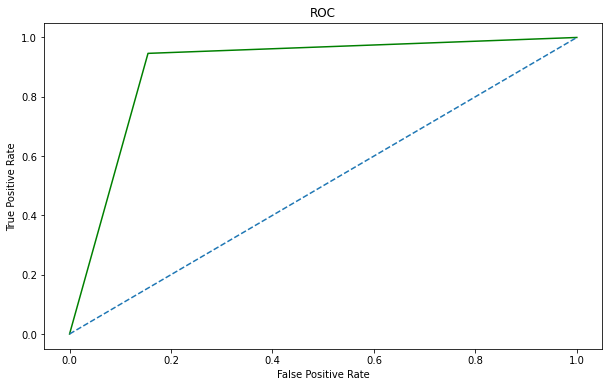

In [221]:
from sklearn.metrics import roc_curve,roc_auc_score
knn_sm_train_fpr, knn_sm_train_tpr,_=roc_curve(train_smote['FORECLOSURE'],knn_SM_train_predict)
plt.plot(knn_sm_train_fpr,knn_sm_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_sm_train_auc=roc_auc_score(train_smote['FORECLOSURE'],knn_SM_train_predict)
print('Area under Curve is', knn_sm_train_auc)

0.1 

Accuracy Score 0.8886
F1 Score 0.8793 

Confusion Matrix


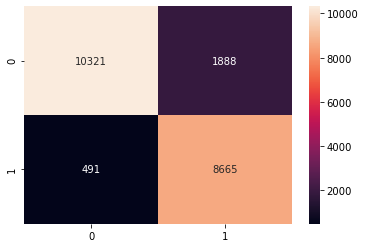

0.2 

Accuracy Score 0.8886
F1 Score 0.8793 

Confusion Matrix


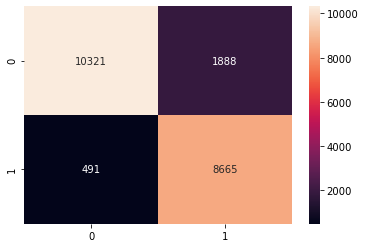

0.3 

Accuracy Score 0.8886
F1 Score 0.8793 

Confusion Matrix


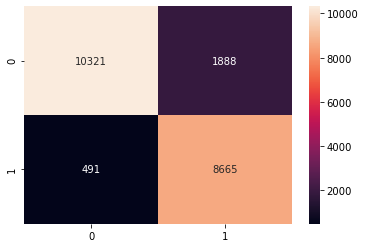

0.4 

Accuracy Score 0.8886
F1 Score 0.8793 

Confusion Matrix


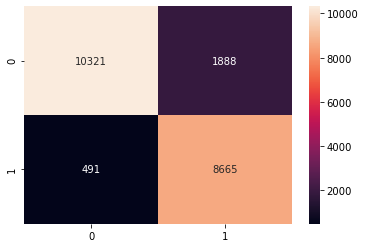

0.5 

Accuracy Score 0.8886
F1 Score 0.8793 

Confusion Matrix


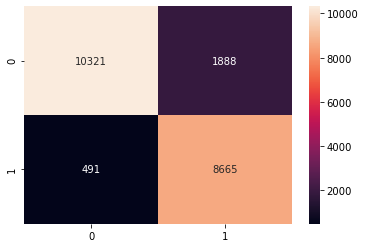

0.6 

Accuracy Score 0.8886
F1 Score 0.8793 

Confusion Matrix


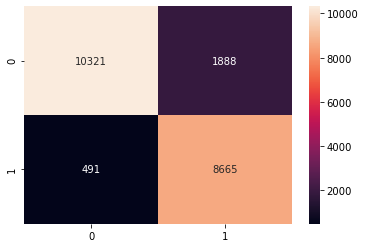

0.7 

Accuracy Score 0.8886
F1 Score 0.8793 

Confusion Matrix


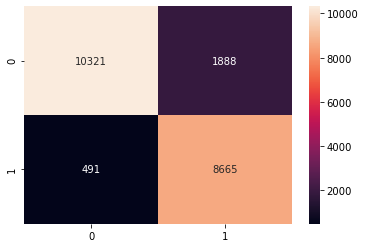

0.8 

Accuracy Score 0.8886
F1 Score 0.8793 

Confusion Matrix


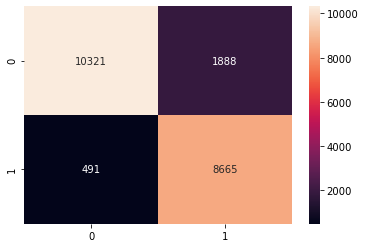

0.9 

Accuracy Score 0.8886
F1 Score 0.8793 

Confusion Matrix


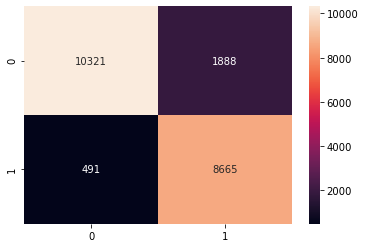

In [222]:
# KNN - Change the cut-off values for maximum accuracy?
from sklearn.metrics import roc_curve,roc_auc_score
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_res)):#defining a loop for the length of the data
        if np.array(knn_SM_train_predict)[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_res,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_res,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_res,custom_cutoff_data),annot=True,fmt='.6g'),'\n\n'
    plt.show();

# GAUSSIAN NAIVE BAYES

In [223]:
from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()
model = GNB_model.fit(X_train, y_train.ravel())

In [224]:
# Performance Matrix on train data set
gnb_y_train_predict = model.predict(X_train)
print(metrics.classification_report(y_train, gnb_y_train_predict))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     12209
           1       0.20      0.22      0.21      1199

    accuracy                           0.85     13408
   macro avg       0.56      0.57      0.56     13408
weighted avg       0.86      0.85      0.85     13408



In [225]:
# Performance Matrix on test data set
gnb_y_test_predict = model.predict(X_test)
print(metrics.classification_report(y_test, gnb_y_test_predict))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      6008
           1       0.18      0.19      0.18       596

    accuracy                           0.85      6604
   macro avg       0.55      0.55      0.55      6604
weighted avg       0.85      0.85      0.85      6604



GNB - Area under Curve for Train Data is 0.5653481950551116
GNB - Area under Curve for Test Data is 0.5505176543132646


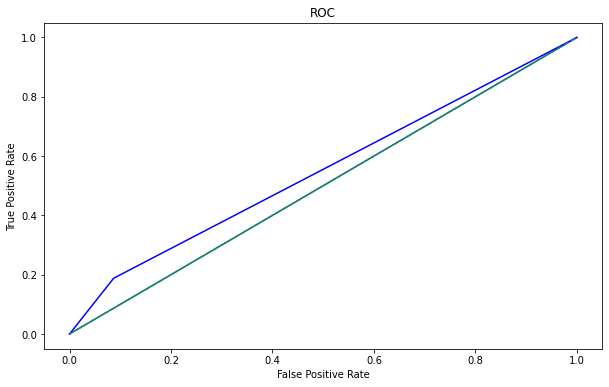

In [226]:
from sklearn.metrics import roc_curve,roc_auc_score
gnb_train_fpr, gnb_train_tpr,_=roc_curve(train['FORECLOSURE'],gnb_y_train_predict)
plt.plot(gnb_train_fpr,gnb_train_fpr,color='green')
gnb_test_fpr, gnb_test_tpr,_=roc_curve(test['FORECLOSURE'],gnb_y_test_predict)
plt.plot(gnb_test_fpr,gnb_test_tpr,color='blue')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
gnb_train_auc=roc_auc_score(train['FORECLOSURE'],gnb_y_train_predict)
gnb_test_auc=roc_auc_score(test['FORECLOSURE'],gnb_y_test_predict)
print('GNB - Area under Curve for Train Data is', gnb_train_auc)
print('GNB - Area under Curve for Test Data is', gnb_test_auc)

In [227]:
#GNB on SMOTE dataset
GNB_model = GaussianNB()
model = GNB_model.fit(X_res, y_res.ravel())

In [228]:
# Performance Matrix on SMOTE train data set
gnb_sm_y_train_predict = model.predict(X_res)
print(metrics.classification_report(y_res, gnb_sm_y_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70     12209
           1       0.59      0.54      0.56      9156

    accuracy                           0.64     21365
   macro avg       0.63      0.63      0.63     21365
weighted avg       0.64      0.64      0.64     21365



Area under Curve is 0.6286019307101476


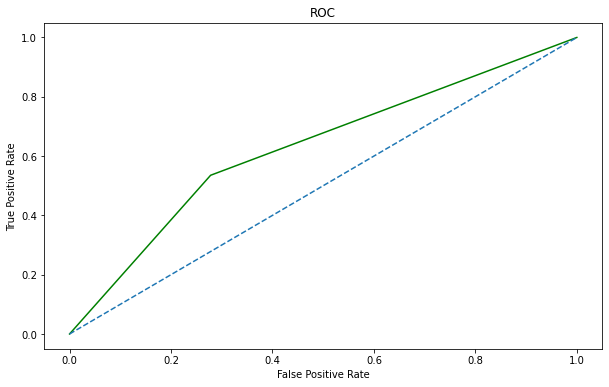

In [229]:
from sklearn.metrics import roc_curve,roc_auc_score
gnb_sm_train_fpr, gnb_sm_train_tpr,_=roc_curve(train_smote['FORECLOSURE'],gnb_sm_y_train_predict)
plt.plot(gnb_sm_train_fpr,gnb_sm_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
gnb_sm_train_auc=roc_auc_score(train_smote['FORECLOSURE'],gnb_sm_y_train_predict)
print('Area under Curve is', gnb_sm_train_auc)

# Random Forest with Bagging Classifier

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier

rf = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=50,random_state=1)
model=Bagging_model.fit(X_res, y_res)

In [231]:
## Performance Matrix on train data set
RF_BGCL_train_predict = model.predict(X_res)
print(metrics.classification_report(y_res, RF_BGCL_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12209
           1       1.00      1.00      1.00      9156

    accuracy                           1.00     21365
   macro avg       1.00      1.00      1.00     21365
weighted avg       1.00      1.00      1.00     21365



Area under Curve is 0.9962048154250703


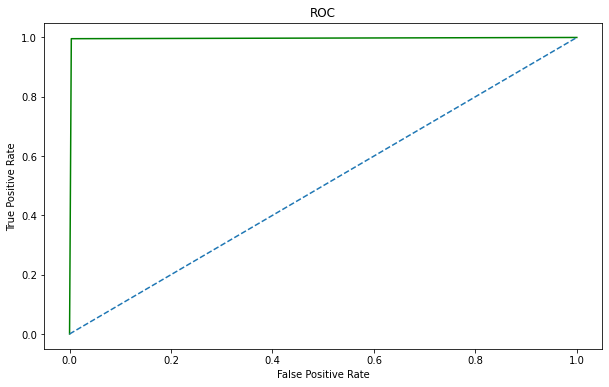

In [232]:
from sklearn.metrics import roc_curve,roc_auc_score
rfbgcl_sm_train_fpr, rfbgcl_sm_train_tpr,_=roc_curve(train_smote['FORECLOSURE'],RF_BGCL_train_predict)
plt.plot(rfbgcl_sm_train_fpr,rfbgcl_sm_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rfbgcl_sm_train_auc=roc_auc_score(train_smote['FORECLOSURE'],RF_BGCL_train_predict)
print('Area under Curve is', rfbgcl_sm_train_auc)